## **The code Below Containing Visualisation of the 3 dataset. The datasets was provided by Startsafe,Uk**


1.   Frozen Baggings(Dataset_1)
2.   Smoking Lounge quick inspection(Dataset_2)
3.   Smart Gate inspection (Dataset_3)





# **DataSet_1**
## **Frozen Baggings DataSet**



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm




In [ ]:


file_path = '/content/Frozen Bagging - v3-2023-05-12_122147.csv'
df = pd.read_csv(file_path)
df.head()



,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset Name,Asset Unique Code,Shift,Line,...,Packaging Label- Photo,Bags Accepted,Bags Rejected,Total,Mean Value,SM/PL Signature.1,Comments.1,Signature,Comments.2,SM/PL Signature.2
0,R0525,2023-05-10T16:18:54.000Z,user 1,0:10:05,52.7237157 -2.4620562,NaN,Frozen Costco Chicken Brst Fillet 2950g,2231,NaN,NaN,...,NaN,377.0,4.0,381.0,2967.4,NaN,Shot running,NaN,NaN,NaN
1,R0523,2023-05-10T16:03:50.000Z,user 1,0:19:54,52.7235924 -2.462207,NaN,Frozen Costco Chicken Brst Fillet 2950g,2231,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kill date +6 days macro sample,NaN,NaN,NaN
2,R0507,2023-04-25T16:59:12.000Z,user 1,0:06:32,52.7237117 -2.4621401,NaN,Frozen FF Chicken Drum 6x2.4kg,4642,NaN,NaN,...,NaN,574.0,3.0,577.0,2408.4,NaN,NaN,NaN,NaN,NaN
3,R0506,2023-04-25T16:14:23.000Z,user 1,0:13:07,52.7236185 -2.4622293,NaN,Frozen FF Chicken Drum 6x2.4kg,4642,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R0502,2023-04-25T15:25:02.000Z,user 1,0:08:22,52.7235995 -2.4623048,NaN,Frozen Costco Chicken Brst Fillet 2950g,2231,NaN,NaN,...,NaN,1590.0,107.0,1607.0,2985.2,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset Name,Asset Unique Code,Shift,Line,...,Packaging Label- Photo,Bags Accepted,Bags Rejected,Total,Mean Value,SM/PL Signature.1,Comments.1,Signature,Comments.2,SM/PL Signature.2
0,R0525,2023-05-10T16:18:54.000Z,user 1,0:10:05,52.7237157 -2.4620562,NaN,Frozen Costco Chicken Brst Fillet 2950g,2231,NaN,NaN,...,NaN,377.0,4.0,381.0,2967.4,NaN,Shot running,NaN,NaN,NaN
1,R0523,2023-05-10T16:03:50.000Z,user 1,0:19:54,52.7235924 -2.462207,NaN,Frozen Costco Chicken Brst Fillet 2950g,2231,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kill date +6 days macro sample,NaN,NaN,NaN
2,R0507,2023-04-25T16:59:12.000Z,user 1,0:06:32,52.7237117 -2.4621401,NaN,Frozen FF Chicken Drum 6x2.4kg,4642,NaN,NaN,...,NaN,574.0,3.0,577.0,2408.4,NaN,NaN,NaN,NaN,NaN
3,R0506,2023-04-25T16:14:23.000Z,user 1,0:13:07,52.7236185 -2.4622293,NaN,Frozen FF Chicken Drum 6x2.4kg,4642,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R0502,2023-04-25T15:25:02.000Z,user 1,0:08:22,52.7235995 -2.4623048,NaN,Frozen Costco Chicken Brst Fillet 2950g,2231,NaN,NaN,...,NaN,1590.0,107.0,1607.0,2985.2,NaN,NaN,NaN,NaN,NaN


## **Data Cleaning**

In [ ]:
# Remove columns that are completely empty
df_cleaned = df.dropna(axis=1, how='all')

In [ ]:
missing_percentage = df_cleaned.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
Report No         0.000000
Completed At      0.000000
Completed By      0.000000
Duration          0.000000
Coordinates       0.000000
                   ...    
Bags Accepted    77.070064
Bags Rejected    77.070064
Total            77.070064
Mean Value       77.070064
Comments.1       93.630573
Length: 79, dtype: float64


 **Columns with more than 50% missing values were identified and subsequently removed.**

In [ ]:
threshold = 50  # 50%

#  columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index
print("\nColumns to drop (more than 50% missing data):")
print(columns_to_drop)



Columns to drop (more than 50% missing data):
Index(['Start of Run Test Pieces Present', 'Start of Run  20mm Sphere',
       'Start of Run Memory Test', 'Fail Safes ', 'T2 Sample Check',
       'Packaging Tare Weight', 'Checkweigher Tare Weight',
       'Bench Scale Tare Weight', 'Weight Difference', 'Bin Full Reject',
       'Film- Correct', 'Box - Correct', 'Piece Weight Difference',
       'Pack Weight Check 7 (g)', 'Pack Weight Check 8 (g)',
       'Pack Weight Check 9 (g)', 'Pack Weight Check 10 (g)',
       'Pack Weight Check 11 (g)', 'Pack Weight Check 12 (g)', 'Bags Accepted',
       'Bags Rejected', 'Total', 'Mean Value', 'Comments.1'],
      dtype='object')


In [ ]:
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the DataFrame info after dropping columns
print("\nDataFrame info after dropping columns with more than 50% missing data:")
df_cleaned.info()



DataFrame info after dropping columns with more than 50% missing data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Report No                                     157 non-null    object 
 1   Completed At                                  157 non-null    object 
 2   Completed By                                  157 non-null    object 
 3   Duration                                      157 non-null    object 
 4   Coordinates                                   157 non-null    object 
 5   Asset Name                                    157 non-null    object 
 6   Asset Unique Code                             157 non-null    int64  
 7   Mixed                                         157 non-null    object 
 8   Sphere                                        157 non-null    object

In [ ]:
df_cleaned.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Name,Asset Unique Code,Mixed,Sphere,Ferrous,...,Pack Weight Check 6 (g),Pack Weight Sum,Pack Weight Average,Date of Kill,Best Before,Date of Cut,Label/Pouch Information,OCM Information,Use By Date - Pack vs OCM,GB Code
0,R0525,2023-05-10T16:18:54.000Z,user 1,0:10:05,52.7237157 -2.4620562,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,NaN,15010,3002.000,2023-05-04T17:12:33+01:00,2024-11-01T17:12:33+00:00,2023-05-04T17:12:33+01:00,yes,yes,yes,4667
1,R0523,2023-05-10T16:03:50.000Z,user 1,0:19:54,52.7235924 -2.462207,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,NaN,15009,3001.800,2023-05-04T16:52:24+01:00,2024-11-01T16:52:24+00:00,2023-05-04T16:52:25+01:00,yes,yes,yes,4667
2,R0507,2023-04-25T16:59:12.000Z,user 1,0:06:32,52.7237117 -2.4621401,Frozen FF Chicken Drum 6x2.4kg,4642,no,pass,pass,...,2402.0,14468,2411.333,2023-04-20T17:55:46+01:00,2024-10-01T17:55:46+01:00,2023-04-20T17:55:46+01:00,yes,yes,yes,4667
3,R0506,2023-04-25T16:14:23.000Z,user 1,0:13:07,52.7236185 -2.4622293,Frozen FF Chicken Drum 6x2.4kg,4642,no,pass,pass,...,2411.0,14465,2410.833,2023-04-20T17:11:10+01:00,2024-10-01T17:11:10+01:00,2023-04-20T17:11:10+01:00,yes,yes,yes,4667
4,R0502,2023-04-25T15:25:02.000Z,user 1,0:08:22,52.7235995 -2.4623048,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,NaN,15001,3000.200,2023-04-20T16:20:14+01:00,2024-10-01T16:20:14+01:00,2023-04-20T16:20:14+01:00,yes,yes,yes,4667


**Used KNN Imputer to impute Columns**

In [ ]:

# Select the columns to apply KNN imputation
columns_to_impute = ['Piece Weight Check 8 (g)', 'Piece Weight Check 9 (g)',
                     'Piece Weight Check 10 (g)', 'Piece Weight Min ',
                     'Pack Weight Check 5 (g)', 'Pack Weight Check 6 (g)']

# Initialiation of  the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Appling KNN Imputation
df_cleaned[columns_to_impute] = knn_imputer.fit_transform(df_cleaned[columns_to_impute])


In [ ]:
df_cleaned.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Name,Asset Unique Code,Mixed,Sphere,Ferrous,...,Pack Weight Check 6 (g),Pack Weight Sum,Pack Weight Average,Date of Kill,Best Before,Date of Cut,Label/Pouch Information,OCM Information,Use By Date - Pack vs OCM,GB Code
0,R0525,2023-05-10T16:18:54.000Z,user 1,0:10:05,52.7237157 -2.4620562,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,2551.4,15010,3002.000,2023-05-04T17:12:33+01:00,2024-11-01T17:12:33+00:00,2023-05-04T17:12:33+01:00,yes,yes,yes,4667
1,R0523,2023-05-10T16:03:50.000Z,user 1,0:19:54,52.7235924 -2.462207,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,2551.4,15009,3001.800,2023-05-04T16:52:24+01:00,2024-11-01T16:52:24+00:00,2023-05-04T16:52:25+01:00,yes,yes,yes,4667
2,R0507,2023-04-25T16:59:12.000Z,user 1,0:06:32,52.7237117 -2.4621401,Frozen FF Chicken Drum 6x2.4kg,4642,no,pass,pass,...,2402.0,14468,2411.333,2023-04-20T17:55:46+01:00,2024-10-01T17:55:46+01:00,2023-04-20T17:55:46+01:00,yes,yes,yes,4667
3,R0506,2023-04-25T16:14:23.000Z,user 1,0:13:07,52.7236185 -2.4622293,Frozen FF Chicken Drum 6x2.4kg,4642,no,pass,pass,...,2411.0,14465,2410.833,2023-04-20T17:11:10+01:00,2024-10-01T17:11:10+01:00,2023-04-20T17:11:10+01:00,yes,yes,yes,4667
4,R0502,2023-04-25T15:25:02.000Z,user 1,0:08:22,52.7235995 -2.4623048,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,2551.4,15001,3000.200,2023-04-20T16:20:14+01:00,2024-10-01T16:20:14+01:00,2023-04-20T16:20:14+01:00,yes,yes,yes,4667


In [ ]:
df.shape

(157, 110)

In [ ]:
print(df_cleaned.columns.tolist())



['Report No', 'Completed At', 'Completed By', 'Duration', 'Coordinates', 'Asset Name', 'Asset Unique Code', 'Mixed ', 'Sphere', 'Ferrous', 'Stainless Steel', 'Non Ferrous', 'Skin on', 'Does the product meet individual standards? ', 'Print Integrity Labels', 'Integrity Cardboard', 'GB code ', 'Spiral Temperature Check 1 (⁰C)', 'Spiral Temperature Check 2 (⁰C)', 'Spiral Temperature Check 3 (⁰C)', 'Spiral Average Temperature', 'Air Temperature ', 'Weight Range', 'Portions', 'Piece Weight Check 1 (g)', 'Piece Weight Check 2 (g)', 'Piece Weight Check 3 (g)', 'Piece Weight Check 4 (g)', 'Piece Weight Check 5 (g)', 'Piece Weight Check 6 (g)', 'Piece Weight Check 7 (g)', 'Piece Weight Check 8 (g)', 'Piece Weight Check 9 (g)', 'Piece Weight Check 10 (g)', 'Sum of  Piece Weights', 'Average Piece Weight', 'Piece Weight Min ', 'Piece Weight Max', 'UPO', 'UPO Verification', 'Pack Weight Check 1 (g)', 'Pack Weight Check 2 (g)', 'Pack Weight Check 3 (g)', 'Pack Weight Check 4 (g)', 'Pack Weight Check

## **Descriptive statistic**
 Basic statistis implementation

In [ ]:
#Descriptive statistic

descriptive_stats = df_cleaned.describe(include='all')
descriptive_stats



,Report No,Completed At,Completed By,Duration,Coordinates,Asset Name,Asset Unique Code,Mixed,Sphere,Ferrous,...,Pack Weight Check 6 (g),Pack Weight Sum,Pack Weight Average,Date of Kill,Best Before,Date of Cut,Label/Pouch Information,OCM Information,Use By Date - Pack vs OCM,GB Code
count,157,157,157,157,157,157,157.000000,157,157,157,...,157.000000,157.000000,157.000000,154,154,154,157,157,157,157.0
unique,157,157,5,145,156,17,NaN,1,1,1,...,NaN,NaN,NaN,154,154,154,1,1,1,NaN
top,R0525,2023-05-10T16:18:54.000Z,user 1,0:06:32,52.7236328 -2.4622321,Frozen FF Chicken Drum 6x2.4kg,NaN,no,pass,pass,...,NaN,NaN,NaN,2023-05-04T17:12:33+01:00,2024-11-01T17:12:33+00:00,2023-05-04T17:12:33+01:00,yes,yes,yes,NaN
freq,1,1,57,3,2,28,NaN,157,157,157,...,NaN,NaN,NaN,1,1,1,157,157,157,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5210.121019,NaN,NaN,NaN,...,1958.294268,13209.242038,2112.832822,NaN,NaN,NaN,NaN,NaN,NaN,4667.0
std,NaN,NaN,NaN,NaN,NaN,NaN,1235.514537,NaN,NaN,NaN,...,532.631569,3132.684808,744.941511,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,2231.000000,NaN,NaN,NaN,...,1042.000000,8879.000000,12.031000,NaN,NaN,NaN,NaN,NaN,NaN,4667.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,4642.000000,NaN,NaN,NaN,...,1518.000000,12070.000000,1516.750000,NaN,NaN,NaN,NaN,NaN,NaN,4667.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,4818.000000,NaN,NaN,NaN,...,2007.000000,13698.000000,2013.500000,NaN,NaN,NaN,NaN,NaN,NaN,4667.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,6328.000000,NaN,NaN,NaN,...,2465.000000,14789.000000,3002.000000,NaN,NaN,NaN,NaN,NaN,NaN,4667.0




## **Trend Analysis**
Plot trends over time for weights, temperatures, and other metrics

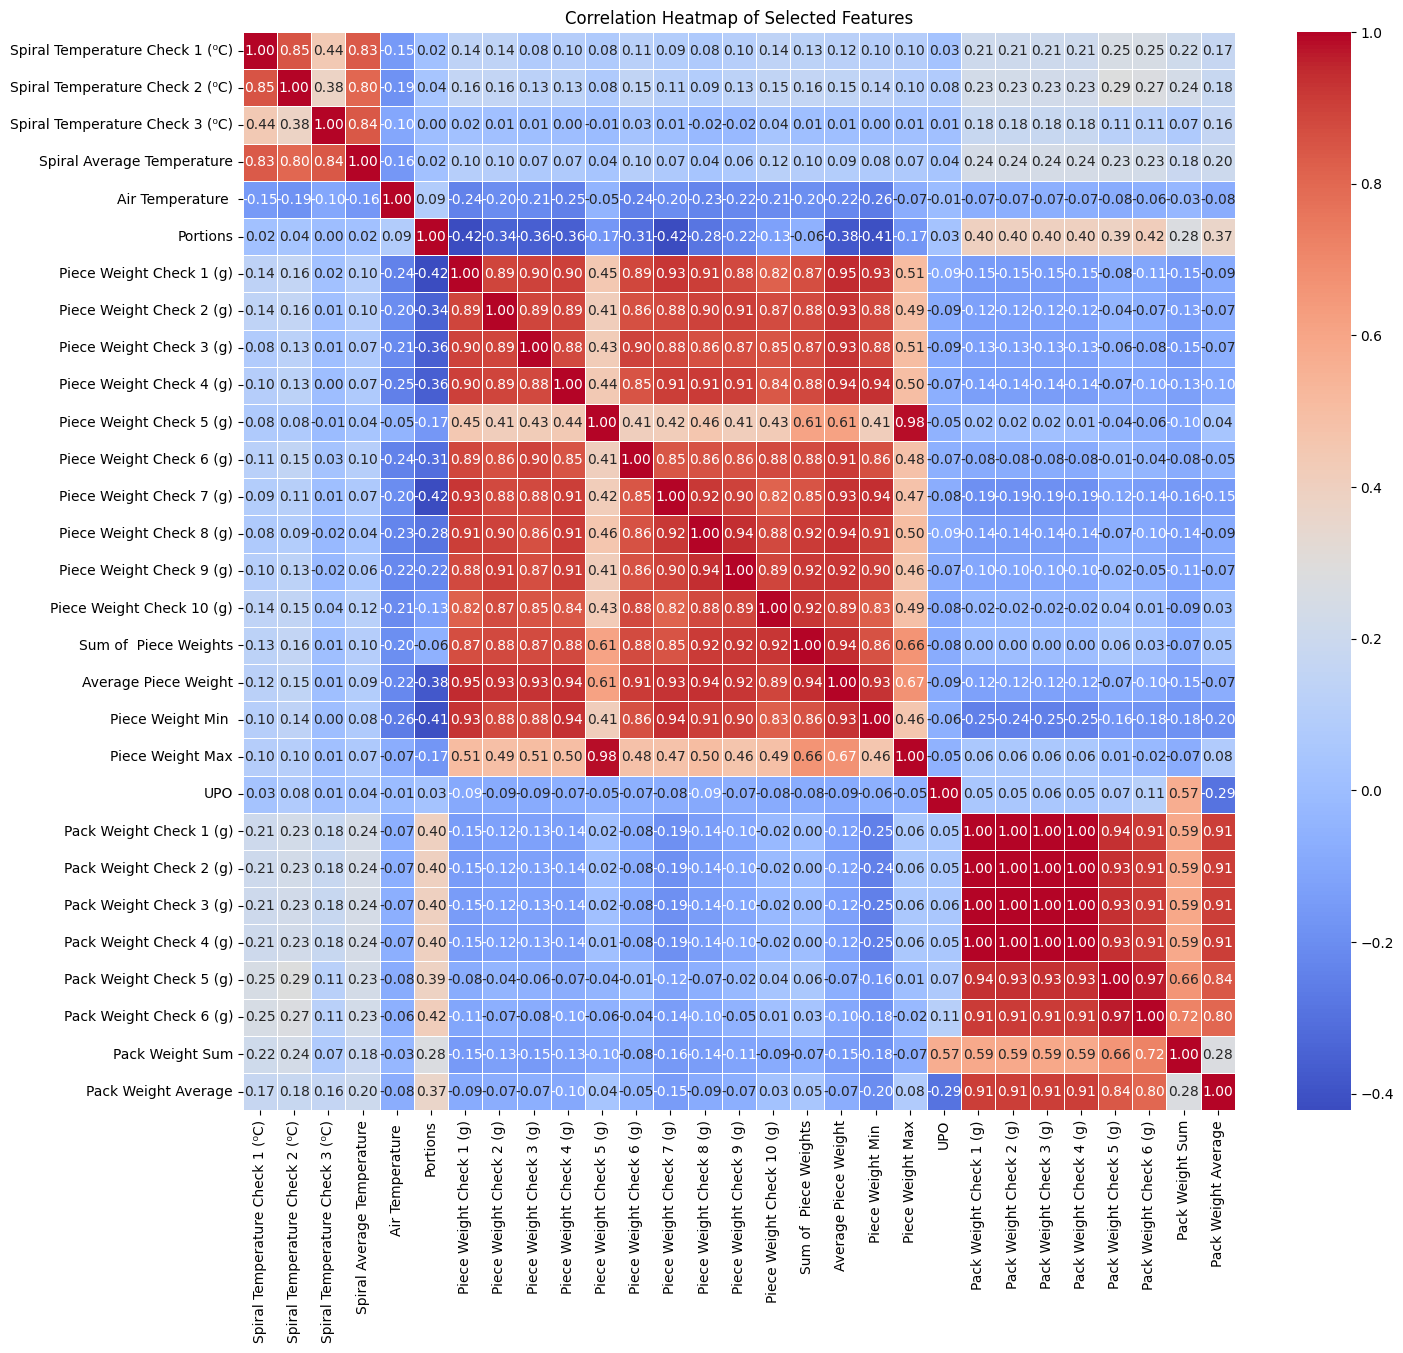

In [ ]:

# important features selection
columns_to_analyze = [
    'Spiral Temperature Check 1 (⁰C)', 'Spiral Temperature Check 2 (⁰C)',
    'Spiral Temperature Check 3 (⁰C)', 'Spiral Average Temperature',
    'Air Temperature ', 'Portions', 'Piece Weight Check 1 (g)',
    'Piece Weight Check 2 (g)', 'Piece Weight Check 3 (g)',
    'Piece Weight Check 4 (g)', 'Piece Weight Check 5 (g)',
    'Piece Weight Check 6 (g)', 'Piece Weight Check 7 (g)',
    'Piece Weight Check 8 (g)', 'Piece Weight Check 9 (g)',
    'Piece Weight Check 10 (g)', 'Sum of  Piece Weights',
    'Average Piece Weight', 'Piece Weight Min ', 'Piece Weight Max',
    'UPO', 'Pack Weight Check 1 (g)', 'Pack Weight Check 2 (g)',
    'Pack Weight Check 3 (g)', 'Pack Weight Check 4 (g)',
    'Pack Weight Check 5 (g)', 'Pack Weight Check 6 (g)',
    'Pack Weight Sum', 'Pack Weight Average'
]

# Filter the DataFrame to include only the specified columns
df_filtered = df_cleaned[columns_to_analyze]

#  correlation matrix
corr_matrix = df_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()



# **Weight Distribution**
Piece Weight checks and Pack Weight checks to visualize distributions.
Identify outliers and investigate their causes.

In [ ]:
relevant_columns = [
    'Completed At', 'Average Piece Weight', 'Spiral Average Temperature',
    'Piece Weight Check 1 (g)', 'Piece Weight Check 2 (g)', 'Piece Weight Check 3 (g)',
    'Piece Weight Check 4 (g)', 'Piece Weight Check 5 (g)', 'Sum of  Piece Weights',
    'Pack Weight Sum', 'Pack Weight Average'
]
df_subset = df_cleaned[relevant_columns]
df_subset['Completed At'] = pd.to_datetime(df_cleaned['Completed At'])
df_subset.set_index('Completed At', inplace=True)

df_subset.describe()
df_subset.sort_index(inplace=True)




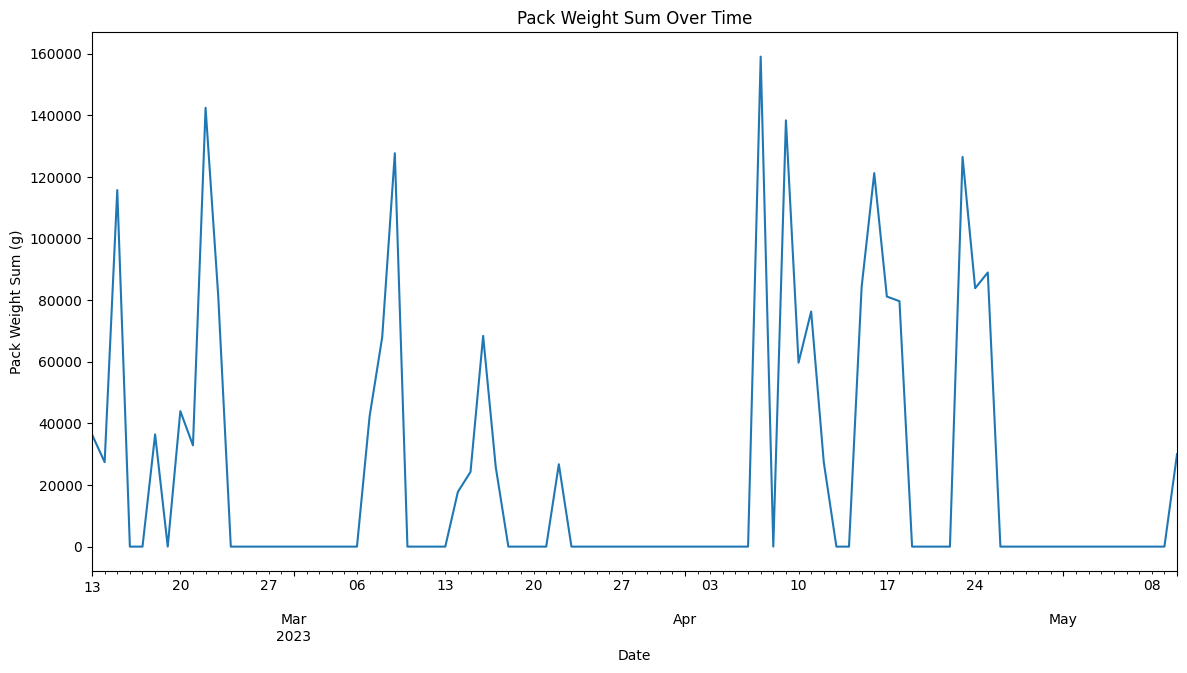

In [ ]:
# Pack Weight Sum over time
plt.figure(figsize=(14, 7))
df_subset['Pack Weight Sum'].resample('D').sum().plot()
plt.title('Pack Weight Sum Over Time')
plt.xlabel('Date')
plt.ylabel('Pack Weight Sum (g)')
plt.show()

                            Average Piece Weight  Spiral Average Temperature  \
Average Piece Weight                    1.000000                    0.089404   
Spiral Average Temperature              0.089404                    1.000000   
Piece Weight Check 1 (g)                0.946942                    0.103845   
Piece Weight Check 2 (g)                0.928585                    0.099785   
Piece Weight Check 3 (g)                0.931826                    0.070733   
Piece Weight Check 4 (g)                0.936009                    0.073253   
Piece Weight Check 5 (g)                0.614441                    0.044350   
Sum of  Piece Weights                   0.943369                    0.096684   
Pack Weight Sum                        -0.146308                    0.184633   
Pack Weight Average                    -0.072295                    0.204613   

                            Piece Weight Check 1 (g)  \
Average Piece Weight                        0.946942   
Spiral 

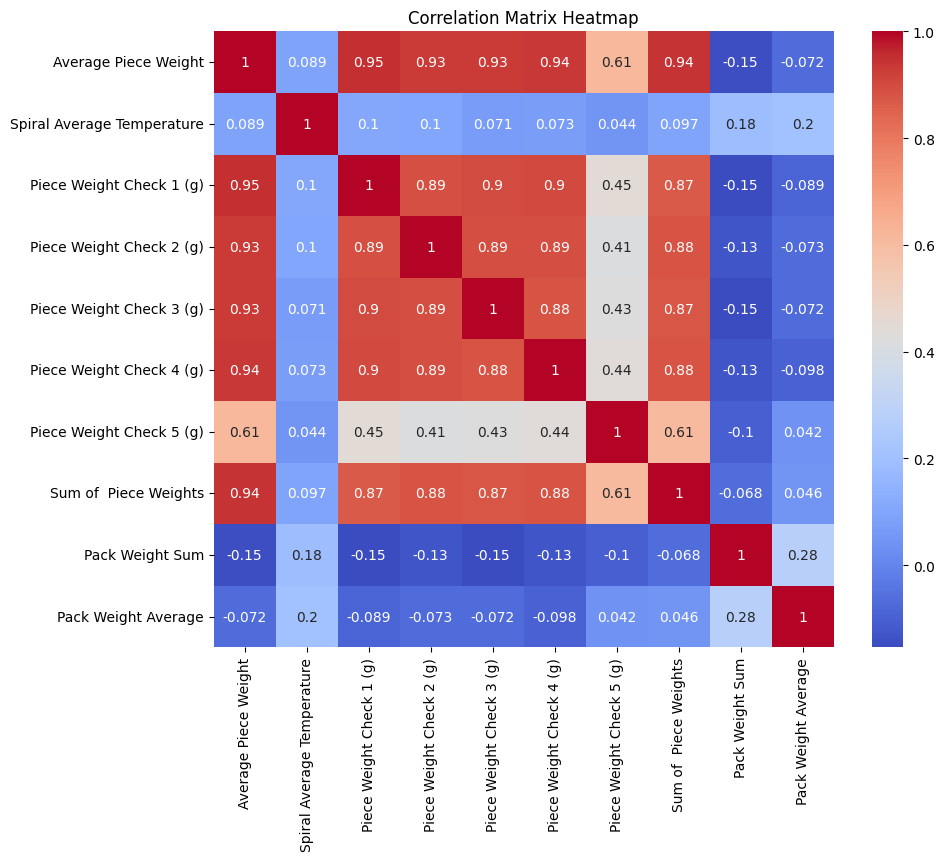

In [ ]:
# Correlation Matrix
correlation_matrix = df_subset.corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


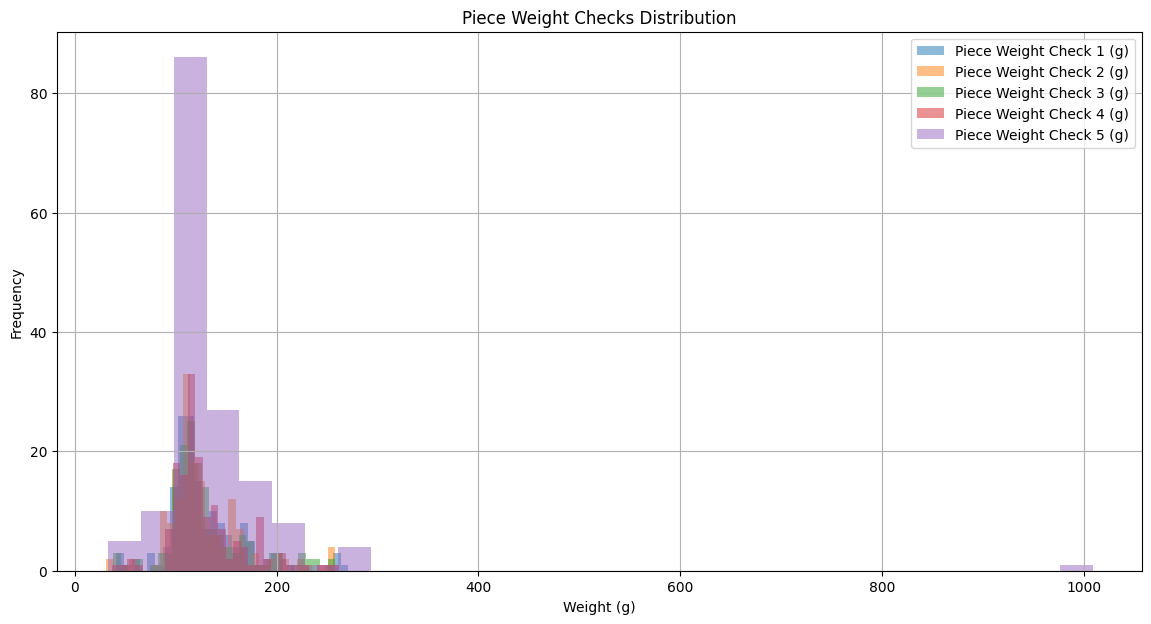

In [ ]:
# List of the first 5 Piece Weight and Pack Weight check columns
piece_weight_columns = [f'Piece Weight Check {i} (g)' for i in range(1, 6)]
pack_weight_columns = [f'Pack Weight Check {i} (g)' for i in range(1, 6)]

#  histograms for the first 5 Piece Weight checks
plt.figure(figsize=(14, 7))
for col in piece_weight_columns:
    if col in df_cleaned.columns:
        df_cleaned[col].dropna().plot(kind='hist', alpha=0.5, bins=30, label=col)
plt.title('Piece Weight Checks Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

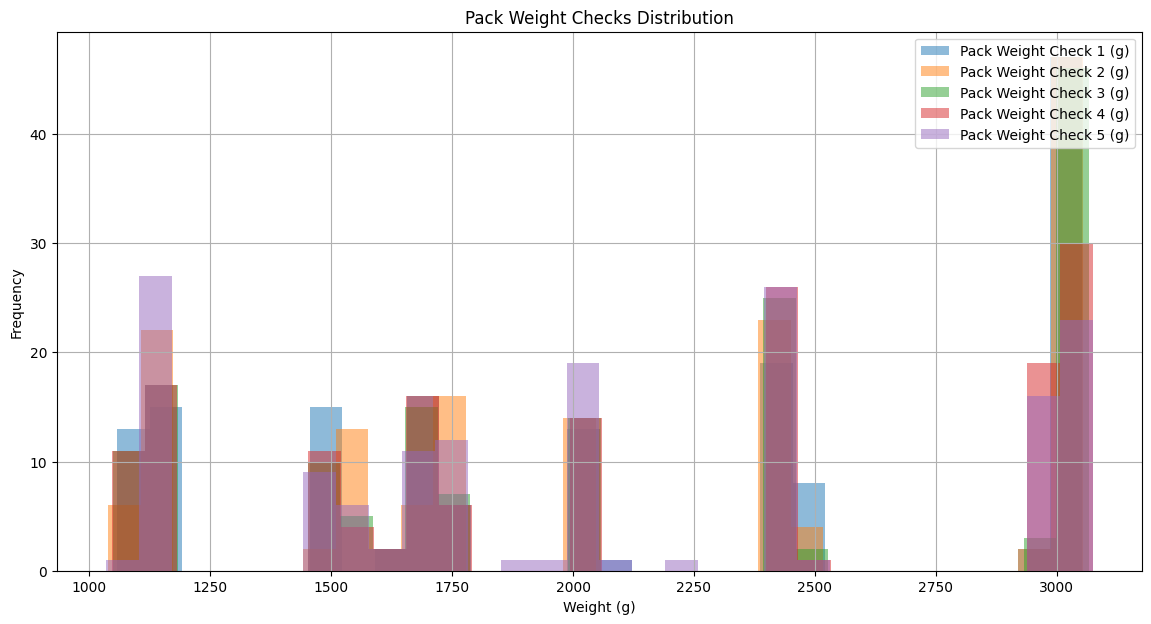

In [ ]:
# histograms for the first 5 Pack Weight checks
plt.figure(figsize=(14, 7))
for col in pack_weight_columns:
    if col in df_cleaned.columns:
        df_cleaned[col].dropna().plot(kind='hist', alpha=0.5, bins=30, label=col)
plt.title('Pack Weight Checks Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

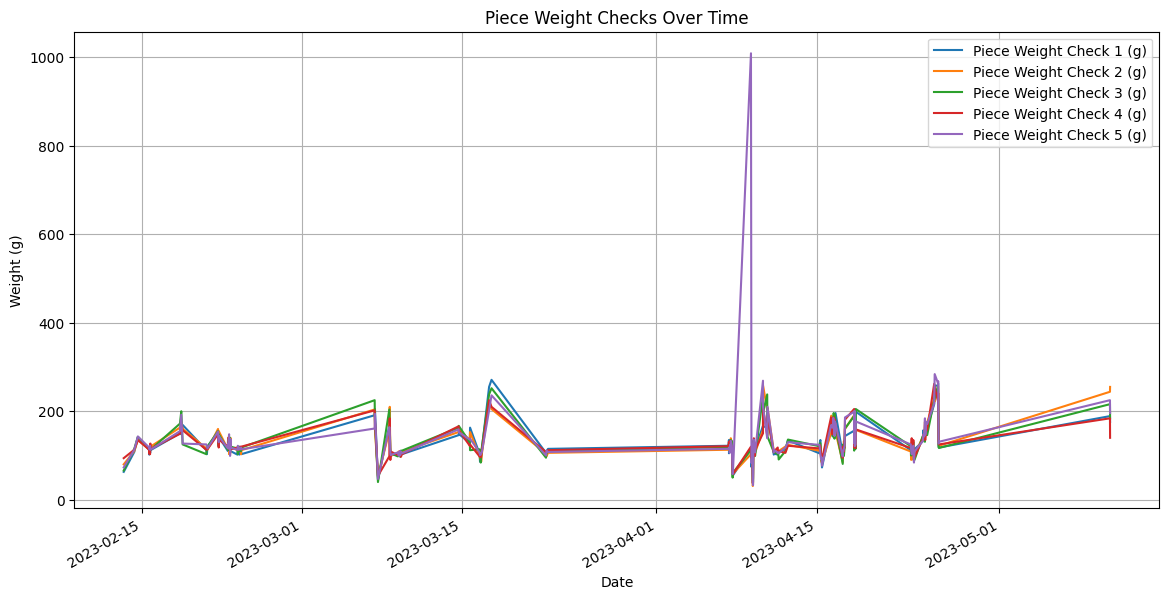

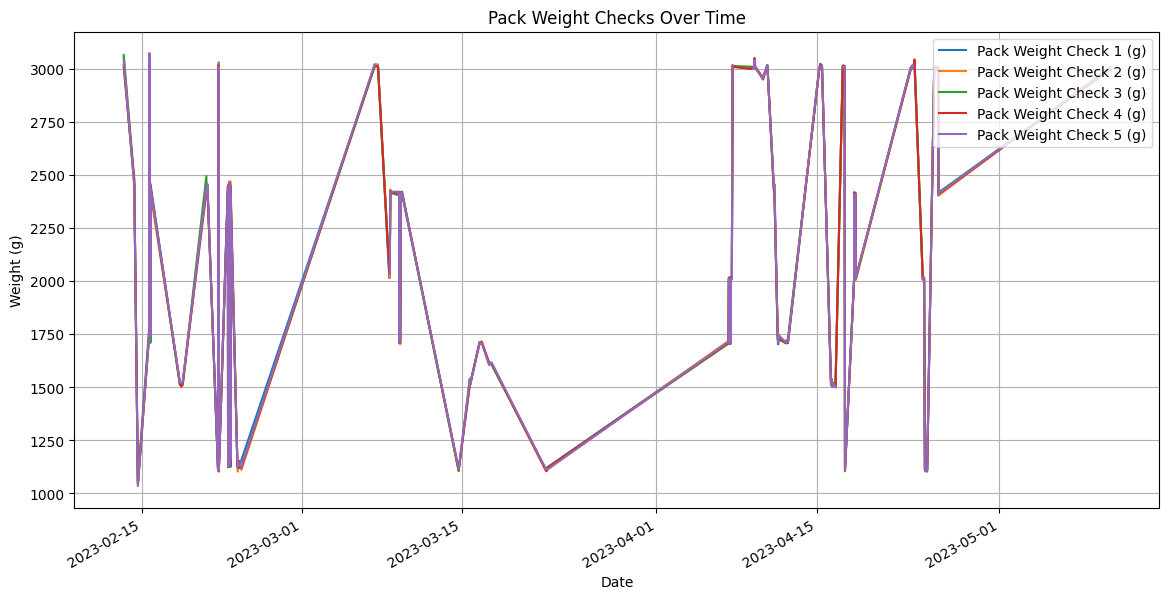

In [ ]:
# List of the first 5 Piece Weight and Pack Weight check columns
piece_weight_columns = [f'Piece Weight Check {i} (g)' for i in range(1, 6)]
pack_weight_columns = [f'Pack Weight Check {i} (g)' for i in range(1, 6)]

df['Completed At'] = pd.to_datetime(df['Completed At'])
#Completed At is the DataFrame index for time series plotting
df.set_index('Completed At', inplace=True)


# Ploting line graphs for the first 5 Piece Weight checks
plt.figure(figsize=(14, 7))
for col in piece_weight_columns:
    if col in df.columns:
        df[col].plot(kind='line', label=col)
plt.title('Piece Weight Checks Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (g)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plotin line graphs for the first 5 Pack Weight checks
plt.figure(figsize=(14, 7))
for col in pack_weight_columns:
    if col in df.columns:
        df[col].plot(kind='line', label=col)
plt.title('Pack Weight Checks Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (g)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# **Temperature Consistency**

In [ ]:
df_cleaned

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Name,Asset Unique Code,Mixed,Sphere,Ferrous,...,Pack Weight Check 6 (g),Pack Weight Sum,Pack Weight Average,Date of Kill,Best Before,Date of Cut,Label/Pouch Information,OCM Information,Use By Date - Pack vs OCM,GB Code
0,R0525,2023-05-10T16:18:54.000Z,user 1,0:10:05,52.7237157 -2.4620562,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,2551.4,15010,3002.000,2023-05-04T17:12:33+01:00,2024-11-01T17:12:33+00:00,2023-05-04T17:12:33+01:00,yes,yes,yes,4667
1,R0523,2023-05-10T16:03:50.000Z,user 1,0:19:54,52.7235924 -2.462207,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,2551.4,15009,3001.800,2023-05-04T16:52:24+01:00,2024-11-01T16:52:24+00:00,2023-05-04T16:52:25+01:00,yes,yes,yes,4667
2,R0507,2023-04-25T16:59:12.000Z,user 1,0:06:32,52.7237117 -2.4621401,Frozen FF Chicken Drum 6x2.4kg,4642,no,pass,pass,...,2402.0,14468,2411.333,2023-04-20T17:55:46+01:00,2024-10-01T17:55:46+01:00,2023-04-20T17:55:46+01:00,yes,yes,yes,4667
3,R0506,2023-04-25T16:14:23.000Z,user 1,0:13:07,52.7236185 -2.4622293,Frozen FF Chicken Drum 6x2.4kg,4642,no,pass,pass,...,2411.0,14465,2410.833,2023-04-20T17:11:10+01:00,2024-10-01T17:11:10+01:00,2023-04-20T17:11:10+01:00,yes,yes,yes,4667
4,R0502,2023-04-25T15:25:02.000Z,user 1,0:08:22,52.7235995 -2.4623048,Frozen Costco Chicken Brst Fillet 2950g,2231,no,pass,pass,...,2551.4,15001,3000.200,2023-04-20T16:20:14+01:00,2024-10-01T16:20:14+01:00,2023-04-20T16:20:14+01:00,yes,yes,yes,4667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,R0010,2023-02-15T15:16:57.000Z,user 4,0:07:17,52.7235886 -2.4623668,Frozen IQF Chicken Drum B Grd 5x3kg,4841,no,pass,pass,...,2555.6,15199,3039.800,2023-02-13T15:14:03+00:00,2024-08-01T15:14:03+01:00,2023-02-13T15:14:03+00:00,yes,yes,yes,4667
153,R0009,2023-02-15T15:00:33.000Z,user 4,0:10:58,52.7237121 -2.4622731,Frozen Iceland Chicken Drumsticks 1.7kg,7072,no,pass,pass,...,1786.0,14054,1756.750,2023-02-14T14:56:02+00:00,2024-08-01T14:56:02+01:00,2023-02-14T14:56:02+00:00,yes,yes,yes,4667
154,R0005,2023-02-14T15:18:12.000Z,user 4,0:31:31,52.7233709 -2.46087,Frozen Morrisons Chicken Drum 12x1kg,4929,no,pass,pass,...,1042.0,12604,1050.333,2023-02-12T15:04:00+00:00,2024-08-01T15:04:00+01:00,2023-02-12T15:04:00+00:00,yes,yes,yes,4667
155,R0003,2023-02-14T07:43:45.000Z,user 5,0:11:05,52.7237032 -2.4622953,Frozen FF Chicken Drum 6x2.4kg,4642,no,pass,pass,...,2486.0,14803,2467.167,2023-02-12T07:39:19+00:00,2024-08-01T07:39:19+01:00,2023-02-12T07:39:19+00:00,yes,yes,yes,4667


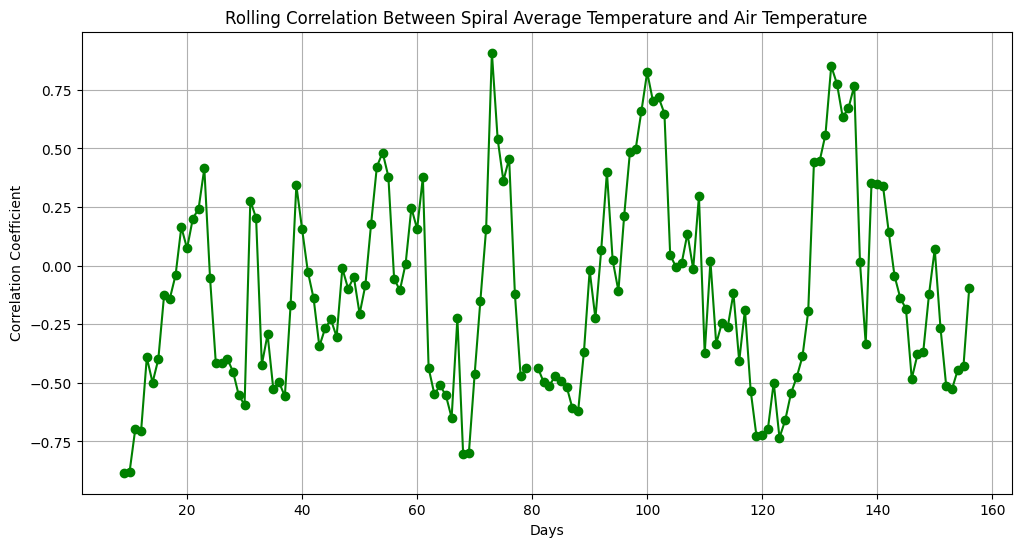

In [ ]:
#insight of rolling correlation of temp
df_cleaned['Temp_Correlation'] = df_cleaned['Spiral Average Temperature'].rolling(window=7).corr(df_cleaned['Air Temperature '])

plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['Temp_Correlation'], color='green', marker='o')
plt.title('Rolling Correlation Between Spiral Average Temperature and Air Temperature')
plt.xlabel('Days')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

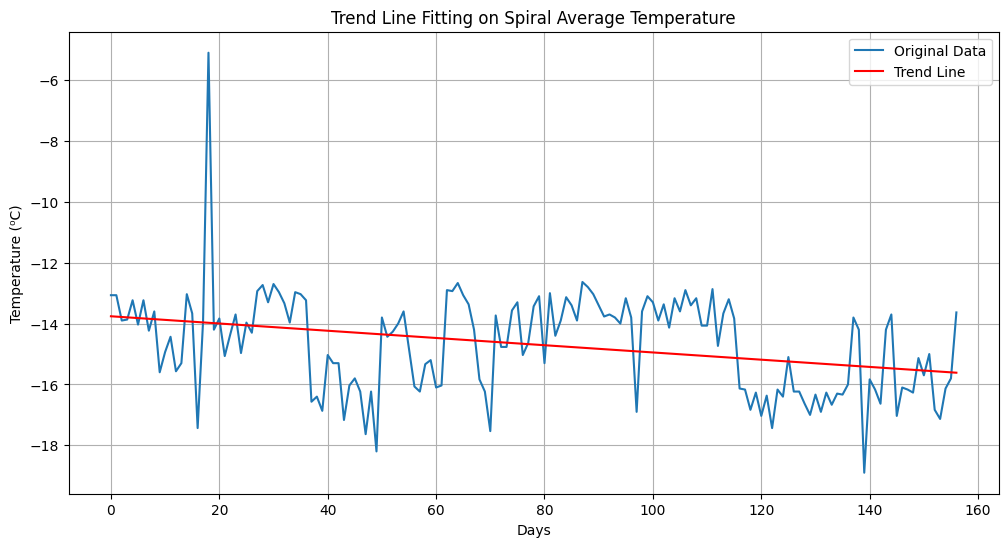

In [ ]:

 # Time variable
X = np.array(range(len(df_cleaned))).reshape(-1, 1)
y = df_cleaned['Spiral Average Temperature'].values

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['Spiral Average Temperature'], label='Original Data')
plt.plot(df_cleaned.index, trend, color='red', label='Trend Line')
plt.title('Trend Line Fitting on Spiral Average Temperature')
plt.xlabel('Days')
plt.ylabel('Temperature (⁰C)')
plt.legend()
plt.grid(True)
plt.show()


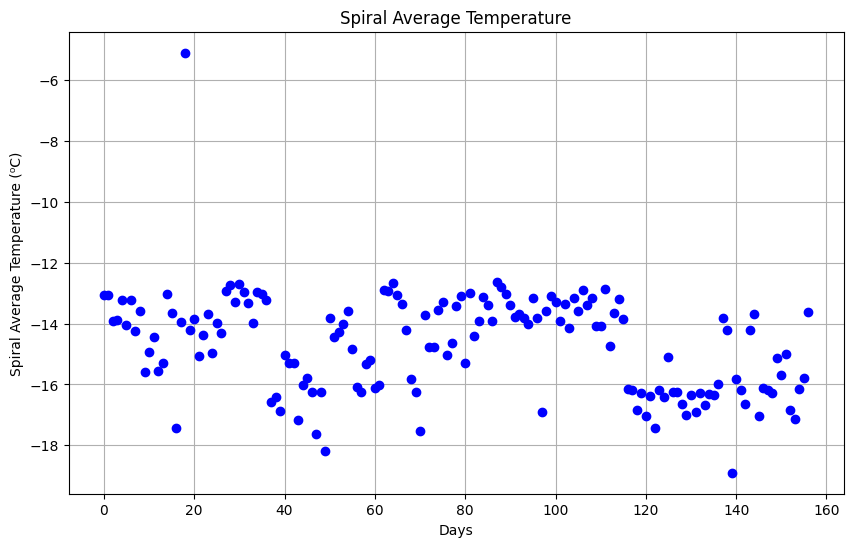

In [ ]:
#Average temperature check

temperatures = df_cleaned['Spiral Average Temperature']

plt.figure(figsize=(10, 6))

# Create the dot plot
plt.plot(temperatures, 'o', color='blue')

# Adding titles and labels
plt.title('Spiral Average Temperature')
plt.xlabel('Days')
plt.ylabel('Spiral Average Temperature (⁰C)')

plt.grid(True)
plt.show()


# **Operational Efficiency**

Analyze Duration and Coordinates to understand time efficiency and geographical performance.

Identify which assets or operators perform best/worst.
How to do this part

In [ ]:

# Converting 'Duration' to a numerical format  HH:MM:SS format
df_cleaned['Duration'] = pd.to_timedelta(df_cleaned['Duration']).dt.total_seconds() / 60  # Convert to minutes

# Analysis of Duration
print("Summary statistics for Duration (in minutes):")
print(df_cleaned['Duration'].describe())

Summary statistics for Duration (in minutes):
count    157.000000
mean       9.729512
std        4.320654
min        4.100000
25%        7.016667
50%        8.533333
75%       11.383333
max       31.516667
Name: Duration, dtype: float64


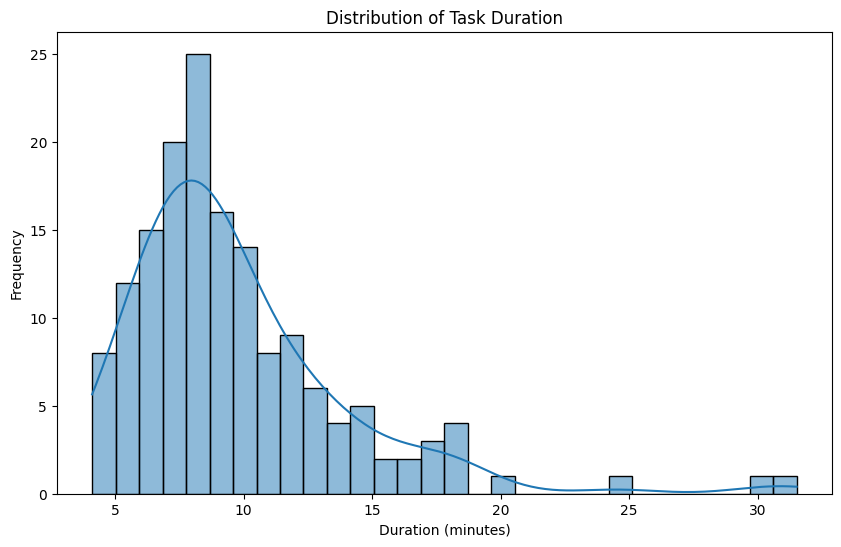

In [ ]:
# Plot Duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Duration'], bins=30, kde=True)
plt.title('Distribution of Task Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Performance by Asset
performance_by_asset = df_cleaned.groupby('Asset Name')['Duration'].agg(['mean', 'median', 'std', 'count']).reset_index()
print("Performance by Asset:")
print(performance_by_asset)


Performance by Asset:
                                  Asset Name       mean     median        std  \
0     Frozen Asda Chicken Drum A Grd 8x1.1kg   8.651389   8.100000   2.238692   
1   Frozen Asda PB ChickenThigh AGrd 8x1.1kg  10.760000   9.800000   5.010326   
2    Frozen Costco Chicken Brst Fillet 2950g  12.285417   9.883333   4.742843   
3           Frozen FF BI Chicken Thigh 6x2kg   9.091026   8.433333   1.960886   
4             Frozen FF Chicken Drum 6x2.4kg   9.425000   8.641667   2.700189   
5    Frozen IQF 2Jt Chicken Wing A Grd 5x3kg  11.800000  11.800000        NaN   
6          Frozen IQF 3Jt Chicken Wing 4x3kg   8.541667   7.650000   3.913631   
7         Frozen IQF 3Jt Chicken Wings 4x3kg   7.195833   6.800000   2.219250   
8        Frozen IQF Chicken Brst Fillet Bulk   8.516667   8.516667   1.461354   
9   Frozen IQF Chicken BrstFillet AGrd 5x3kg  23.025000  23.025000  10.194123   
10       Frozen IQF Chicken Drum B Grd 5x3kg   9.084848   8.533333   2.115701   
11    

## **Performance by Operator**

In [ ]:
# Performance by Operator
performance_by_operator = df_cleaned.groupby('Completed By')['Duration'].agg(['mean', 'median', 'std', 'count']).reset_index()
print("Performance by Operator:")
print(performance_by_operator)


Performance by Operator:
  Completed By       mean     median       std  count
0       user 1  10.302339   8.916667  3.596713     57
1       user 2  12.208333  12.375000  2.068057      6
2       user 3   7.328704   6.441667  3.349055     36
3       user 4   9.298582   8.516667  3.970937     47
4       user 5  15.107576  12.950000  6.771478     11


# **Most efficient User**

Most Efficient User:
Completed By      user 3
mean            7.328704
median          6.441667
std             3.349055
count                 36
Name: 2, dtype: object


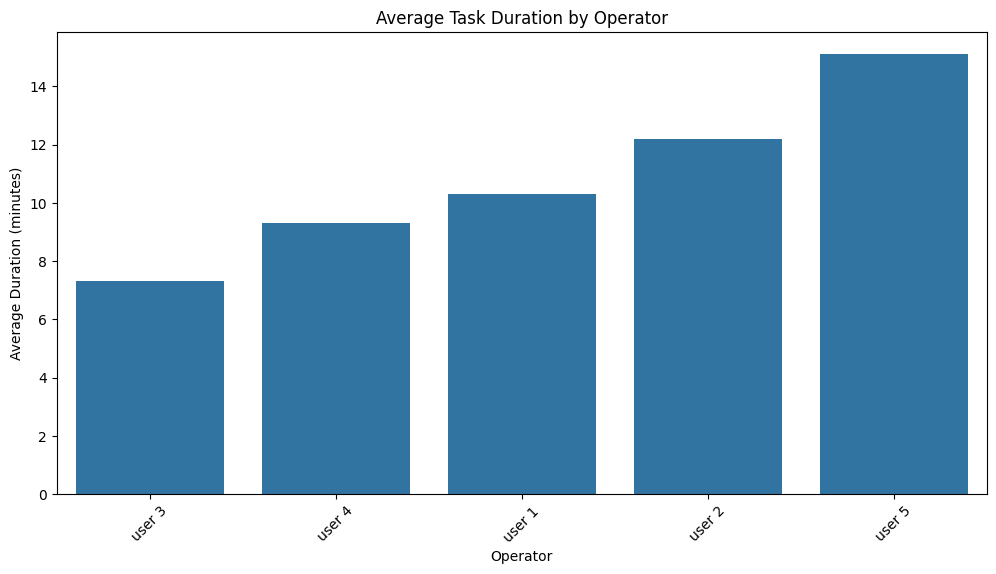

In [ ]:
most_efficient_user = performance_by_operator.loc[performance_by_operator['mean'].idxmin()]

print("Most Efficient User:")
print(most_efficient_user)

# Plot of performance by Operator
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_by_operator, x='Completed By', y='mean', order=performance_by_operator.sort_values('mean')['Completed By'])
plt.title('Average Task Duration by Operator')
plt.xlabel('Operator')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

## **Task Completion Distribution**

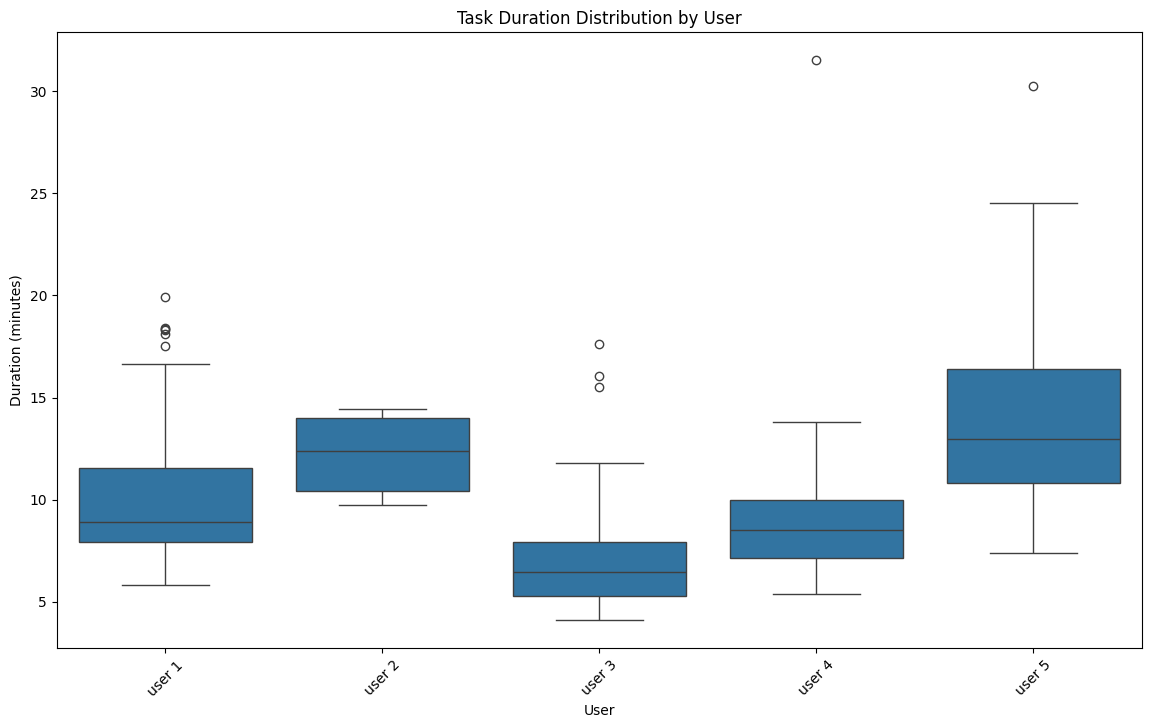

In [ ]:
# Ploting the distribution of task durations for each user
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned, x='Completed By', y='Duration')
plt.title('Task Duration Distribution by User')
plt.xlabel('User')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


## **Average Time Taken per Task**


In [ ]:
# Calculate the duration in minutes
df['Duration'] = pd.to_timedelta(df['Duration']).dt.total_seconds() / 60

# Group by user and calculate the average duration
avg_duration_per_user = df.groupby('Completed By')['Duration'].mean().reset_index()
avg_duration_per_user = avg_duration_per_user.rename(columns={'Duration': 'Average Duration (minutes)'})

print(avg_duration_per_user)

  Completed By  Average Duration (minutes)
0       user 1                   10.302339
1       user 2                   12.208333
2       user 3                    7.328704
3       user 4                    9.298582
4       user 5                   15.107576


## **Completion Rate**


In [ ]:
# Group by user and count the number of tasks completed
completion_rate_per_user = df['Completed By'].value_counts().reset_index()
completion_rate_per_user.columns = ['User', 'Tasks Completed']

print(completion_rate_per_user)

     User  Tasks Completed
0  user 1               57
1  user 4               47
2  user 3               36
3  user 5               11
4  user 2                6


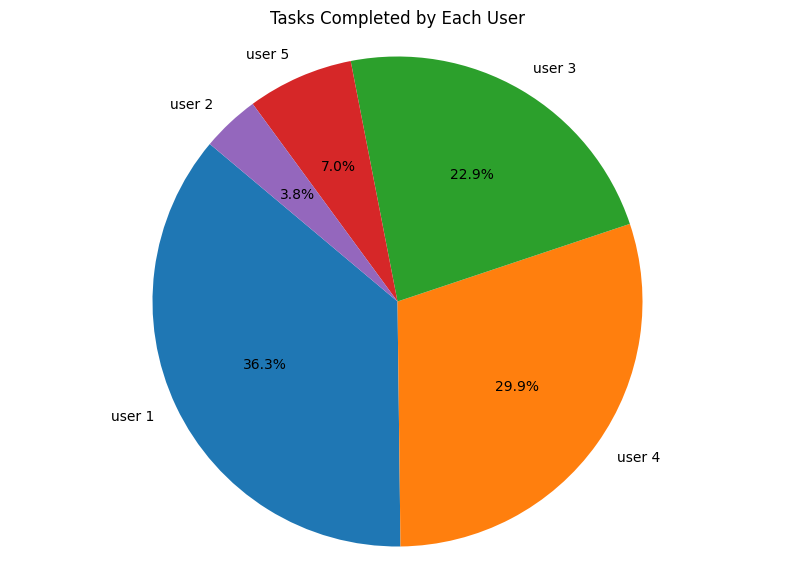

In [ ]:
#  counting the number of tasks completed by group by the users
completion_rate_per_user = df['Completed By'].value_counts().reset_index()
completion_rate_per_user.columns = ['User', 'Tasks Completed']

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(completion_rate_per_user['Tasks Completed'], labels=completion_rate_per_user['User'], autopct='%1.1f%%', startangle=140)
plt.title('Tasks Completed by Each User')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## **Weight Accuracy**



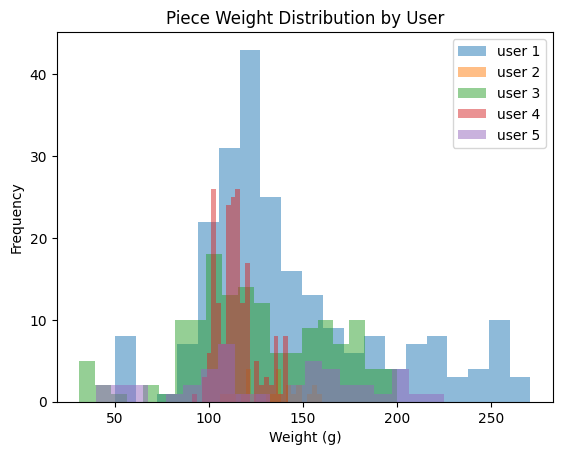

In [ ]:
#  Histogram for Piece Weight checks for each user
for user in df['Completed By'].unique():
    user_df = df[df['Completed By'] == user]
    plt.hist(user_df[['Piece Weight Check 1 (g)', 'Piece Weight Check 2 (g)', 'Piece Weight Check 3 (g)', 'Piece Weight Check 4 (g)']].values.flatten(), bins=20, alpha=0.5, label=user)

plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.title('Piece Weight Distribution by User')
plt.legend()
plt.show()

# **DataSet_2**
## **Smoking Lounge Inspection**

In [ ]:
import pandas as pd

file_path = '/content/jcd_smoking_lounge_quick_inspection_report.xlsx'

# Read the file into a DataFrame
df = pd.read_excel(file_path)
df.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,Flash survey,Number of visitors in the lounge during visit,...,Overview lounge photo,"Are you planning to continue working in this lounge IMMEDIATELY AFTER THIS INSPECTION and execute a task such as repair, cleaning, posting, witnessing a test, etc.?",Tasks scheduled,Task(s),Comments,Task close-out pictures,Pending issues,Is any issue pending after the inspection?,Issue(s) description,Issue(s) picture
0,6995,12/05/2022 08:20,User1,00:02:39,"25.2540504, 55.3514914",Smoking Lounges,Smoking Lounge CC West PM00295,SMOKING LOUNGE CC WEST PM00295,NaN,5,...,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
1,6994,12/05/2022 08:01,User2,00:09:43,"25.2473215, 55.3636452",Smoking Lounges,Smoking lounge CA West PM00291,SMOKING LOUNGE CA WEST PM00291,NaN,12,...,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
2,6993,12/05/2022 07:53,User1,00:06:21,"25.2590287, 55.3431374",Smoking Lounges,Smoking lounge CD West (Noodle house) PM00309,SMOKING LOUNGE CD WEST (NOODLE HOUSE) PM00309,NaN,9,...,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
3,6992,12/05/2022 07:48,User2,00:02:52,"25.2434546, 55.3722564",Smoking Lounges,Smoking lounge CA East PM00290,SMOKING LOUNGE CA EAST PM00290,NaN,15,...,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
4,6991,12/05/2022 07:41,User1,00:01:55,"25.2576423, 55.3458137",Smoking Lounges,Smoking lounge CD East (Giraffe) PM00308,SMOKING LOUNGE CD EAST (GIRAFFE) PM00308,NaN,0,...,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 23 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Report No                                                                                                                                                             3067 non-null   int64  
 1   Completed At                                                                                                                                                          3067 non-null   object 
 2   Completed By                                                                                                

 **Removing colums with no values**

In [ ]:
 # Remove columns where all values are NaN
df_cleaned2 = df.dropna(axis=1, how='all')
df_cleaned2.head()


,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,Number of visitors in the lounge during visit,Temperature within the lounge during the visit,How do you experience the temperature?,How do you perceive the air quality? (amount of smoke),"Are you planning to continue working in this lounge IMMEDIATELY AFTER THIS INSPECTION and execute a task such as repair, cleaning, posting, witnessing a test, etc.?",Task(s),Comments,Is any issue pending after the inspection?,Issue(s) description
0,6995,12/05/2022 08:20,User1,00:02:39,"25.2540504, 55.3514914",Smoking Lounges,Smoking Lounge CC West PM00295,SMOKING LOUNGE CC WEST PM00295,5,22.6,Comfortable,Normal,No,NaN,NaN,No,NaN
1,6994,12/05/2022 08:01,User2,00:09:43,"25.2473215, 55.3636452",Smoking Lounges,Smoking lounge CA West PM00291,SMOKING LOUNGE CA WEST PM00291,12,21.6,Comfortable,Normal,No,NaN,NaN,No,NaN
2,6993,12/05/2022 07:53,User1,00:06:21,"25.2590287, 55.3431374",Smoking Lounges,Smoking lounge CD West (Noodle house) PM00309,SMOKING LOUNGE CD WEST (NOODLE HOUSE) PM00309,9,21.8,Comfortable,Normal,No,NaN,NaN,No,NaN
3,6992,12/05/2022 07:48,User2,00:02:52,"25.2434546, 55.3722564",Smoking Lounges,Smoking lounge CA East PM00290,SMOKING LOUNGE CA EAST PM00290,15,21.5,A bit cold,Normal,No,NaN,NaN,No,NaN
4,6991,12/05/2022 07:41,User1,00:01:55,"25.2576423, 55.3458137",Smoking Lounges,Smoking lounge CD East (Giraffe) PM00308,SMOKING LOUNGE CD EAST (GIRAFFE) PM00308,0,21.1,Comfortable,Normal,No,NaN,NaN,No,NaN


In [ ]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 17 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Report No                                                                                                                                                             3067 non-null   int64  
 1   Completed At                                                                                                                                                          3067 non-null   object 
 2   Completed By                                                                                                

**Deleting Colums with lots of missing data**

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df_cleaned2.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
Report No                                                                                                                                                                0.000000
Completed At                                                                                                                                                             0.000000
Completed By                                                                                                                                                             0.000000
Duration                                                                                                                                                                 0.000000
Coordinates                                                                                                                                                              0.000000
Asset Location                                                   

In [ ]:
# Set the threshold for missing data
threshold = 50  # 50%

# Identify columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index
print("\nColumns to drop (more than 50% missing data):")
print(columns_to_drop)


Columns to drop (more than 50% missing data):
Index(['Task(s)', 'Comments', 'Is any issue pending after the inspection?',
       'Issue(s) description'],
      dtype='object')


In [ ]:
# Drop the columns with more than 50% missing data
df_cleaned2 = df_cleaned2.drop(columns=columns_to_drop)

# Displaying the DataFrame info after dropping columns
print("\nDataFrame info after dropping columns with more than 50% missing data:")
df_cleaned2.info()


DataFrame info after dropping columns with more than 50% missing data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 13 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Report No                                                                                                                                                             3067 non-null   int64  
 1   Completed At                                                                                                                                                          3067 non-null   object 
 2   Completed By                        

In [ ]:
df_cleaned2.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,Number of visitors in the lounge during visit,Temperature within the lounge during the visit,How do you experience the temperature?,How do you perceive the air quality? (amount of smoke),"Are you planning to continue working in this lounge IMMEDIATELY AFTER THIS INSPECTION and execute a task such as repair, cleaning, posting, witnessing a test, etc.?"
0,6995,12/05/2022 08:20,User1,00:02:39,"25.2540504, 55.3514914",Smoking Lounges,Smoking Lounge CC West PM00295,SMOKING LOUNGE CC WEST PM00295,5,22.6,Comfortable,Normal,No
1,6994,12/05/2022 08:01,User2,00:09:43,"25.2473215, 55.3636452",Smoking Lounges,Smoking lounge CA West PM00291,SMOKING LOUNGE CA WEST PM00291,12,21.6,Comfortable,Normal,No
2,6993,12/05/2022 07:53,User1,00:06:21,"25.2590287, 55.3431374",Smoking Lounges,Smoking lounge CD West (Noodle house) PM00309,SMOKING LOUNGE CD WEST (NOODLE HOUSE) PM00309,9,21.8,Comfortable,Normal,No
3,6992,12/05/2022 07:48,User2,00:02:52,"25.2434546, 55.3722564",Smoking Lounges,Smoking lounge CA East PM00290,SMOKING LOUNGE CA EAST PM00290,15,21.5,A bit cold,Normal,No
4,6991,12/05/2022 07:41,User1,00:01:55,"25.2576423, 55.3458137",Smoking Lounges,Smoking lounge CD East (Giraffe) PM00308,SMOKING LOUNGE CD EAST (GIRAFFE) PM00308,0,21.1,Comfortable,Normal,No


# **Renaming Columns**

In [ ]:

 # Renaming some columns
renaming_colums={ 'Number of visitors in the lounge during visit':'VisitorsDuringVisit',
    'Temperature within the lounge during the visit': 'LoungeTemperature',
    'How do you experience the temperature?': 'TemperatureExperience',
    'How do you perceive the air quality? (amount of smoke)': 'AirQualityPerception',
    'Are you planning to continue working in this lounge IMMEDIATELY AFTER THIS INSPECTION and execute a task such as repair, cleaning, posting, witnessing a test, etc.?': 'PostInspectionTask'
}


df_cleaned2.rename(columns=renaming_colums, inplace=True)
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Report No              3067 non-null   int64  
 1   Completed At           3067 non-null   object 
 2   Completed By           3067 non-null   object 
 3   Duration               3067 non-null   object 
 4   Coordinates            3067 non-null   object 
 5   Asset Location         3067 non-null   object 
 6   Asset                  3067 non-null   object 
 7   Asset Unique Code      3067 non-null   object 
 8   VisitorsDuringVisit    3067 non-null   int64  
 9   LoungeTemperature      3067 non-null   float64
 10  TemperatureExperience  3067 non-null   object 
 11  AirQualityPerception   3067 non-null   object 
 12  PostInspectionTask     3067 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 311.6+ KB


In [ ]:
df_cleaned2.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,VisitorsDuringVisit,LoungeTemperature,TemperatureExperience,AirQualityPerception,PostInspectionTask
0,6995,12/05/2022 08:20,User1,00:02:39,"25.2540504, 55.3514914",Smoking Lounges,Smoking Lounge CC West PM00295,SMOKING LOUNGE CC WEST PM00295,5,22.6,Comfortable,Normal,No
1,6994,12/05/2022 08:01,User2,00:09:43,"25.2473215, 55.3636452",Smoking Lounges,Smoking lounge CA West PM00291,SMOKING LOUNGE CA WEST PM00291,12,21.6,Comfortable,Normal,No
2,6993,12/05/2022 07:53,User1,00:06:21,"25.2590287, 55.3431374",Smoking Lounges,Smoking lounge CD West (Noodle house) PM00309,SMOKING LOUNGE CD WEST (NOODLE HOUSE) PM00309,9,21.8,Comfortable,Normal,No
3,6992,12/05/2022 07:48,User2,00:02:52,"25.2434546, 55.3722564",Smoking Lounges,Smoking lounge CA East PM00290,SMOKING LOUNGE CA EAST PM00290,15,21.5,A bit cold,Normal,No
4,6991,12/05/2022 07:41,User1,00:01:55,"25.2576423, 55.3458137",Smoking Lounges,Smoking lounge CD East (Giraffe) PM00308,SMOKING LOUNGE CD EAST (GIRAFFE) PM00308,0,21.1,Comfortable,Normal,No


# **Encoding The categorial data**

In [ ]:
# Define mappings for each column
temp_experience_mapping = {
    'A bit warm': 0,
    'Comfortable': 1,
    'A bit cold': 2,
    'Very cold': 3,
    'Very warm': 4
}

air_quality_mapping = {
    'Normal': 0,
    'A bit more smoky than normal': 1,
    'No Smoke': 2,
    'Very Smoky': 3
}

post_inspection_task_mapping = {
    'Yes': 1,
    'No': 0
}

In [ ]:
# Applying mappings
df_cleaned2['TemperatureExperience_Label'] = df_cleaned2['TemperatureExperience'].map(temp_experience_mapping)
df_cleaned2['AirQualityPerception_Label'] = df_cleaned2['AirQualityPerception'].map(air_quality_mapping)
df_cleaned2['PostInspectionTask_Label'] = df_cleaned2['PostInspectionTask'].map(post_inspection_task_mapping)


In [ ]:
# Verifying the results
print(df_cleaned2[['TemperatureExperience', 'TemperatureExperience_Label']].head())
print(df_cleaned2[['AirQualityPerception', 'AirQualityPerception_Label']].head())
print(df_cleaned2[['PostInspectionTask', 'PostInspectionTask_Label']].head())

  TemperatureExperience  TemperatureExperience_Label
0           Comfortable                            1
1           Comfortable                            1
2           Comfortable                            1
3            A bit cold                            2
4           Comfortable                            1
  AirQualityPerception  AirQualityPerception_Label
0               Normal                           0
1               Normal                           0
2               Normal                           0
3               Normal                           0
4               Normal                           0
  PostInspectionTask  PostInspectionTask_Label
0                 No                         0
1                 No                         0
2                 No                         0
3                 No                         0
4                 No                         0


In [ ]:
df_cleaned2

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,VisitorsDuringVisit,LoungeTemperature,TemperatureExperience,AirQualityPerception,PostInspectionTask,TemperatureExperience_Label,AirQualityPerception_Label,PostInspectionTask_Label
0,6995,12/05/2022 08:20,User1,00:02:39,"25.2540504, 55.3514914",Smoking Lounges,Smoking Lounge CC West PM00295,SMOKING LOUNGE CC WEST PM00295,5,22.6,Comfortable,Normal,No,1,0,0
1,6994,12/05/2022 08:01,User2,00:09:43,"25.2473215, 55.3636452",Smoking Lounges,Smoking lounge CA West PM00291,SMOKING LOUNGE CA WEST PM00291,12,21.6,Comfortable,Normal,No,1,0,0
2,6993,12/05/2022 07:53,User1,00:06:21,"25.2590287, 55.3431374",Smoking Lounges,Smoking lounge CD West (Noodle house) PM00309,SMOKING LOUNGE CD WEST (NOODLE HOUSE) PM00309,9,21.8,Comfortable,Normal,No,1,0,0
3,6992,12/05/2022 07:48,User2,00:02:52,"25.2434546, 55.3722564",Smoking Lounges,Smoking lounge CA East PM00290,SMOKING LOUNGE CA EAST PM00290,15,21.5,A bit cold,Normal,No,2,0,0
4,6991,12/05/2022 07:41,User1,00:01:55,"25.2576423, 55.3458137",Smoking Lounges,Smoking lounge CD East (Giraffe) PM00308,SMOKING LOUNGE CD EAST (GIRAFFE) PM00308,0,21.1,Comfortable,Normal,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,903,08/07/2021 12:21,User2,00:01:34,"25.249861519382094, 55.358992391394096",Smoking Lounges,Smoking Lounge CB West (DownTown Zone) PM00292,SMOKING LOUNGE CB WEST (DOWNTOWN ZONE) PM00292,7,22.0,A bit cold,Normal,No,2,0,0
3063,902,08/07/2021 12:19,User2,00:01:42,"25.249856412039723, 55.35910476835988",Smoking Lounges,Smoking Lounge CB West (DownTown Zone) PM00292,SMOKING LOUNGE CB WEST (DOWNTOWN ZONE) PM00292,6,22.5,A bit cold,Normal,No,2,0,0
3064,901,08/07/2021 11:55,User2,00:05:15,"25.25154534737797, 55.356462103632396",Smoking Lounges,Smoking Lounge CC West PM00295,SMOKING LOUNGE CC WEST PM00295,0,22.2,A bit cold,No Smoke,Yes,2,2,1
3065,900,08/07/2021 09:32,User2,00:04:57,"25.25138226552379, 55.35662983969134",Smoking Lounges,Smoking Lounge CC East PM00294,SMOKING LOUNGE CC EAST PM00294,0,22.0,A bit cold,No Smoke,Yes,2,2,1


In [ ]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Report No                    3067 non-null   int64  
 1   Completed At                 3067 non-null   object 
 2   Completed By                 3067 non-null   object 
 3   Duration                     3067 non-null   object 
 4   Coordinates                  3067 non-null   object 
 5   Asset Location               3067 non-null   object 
 6   Asset                        3067 non-null   object 
 7   Asset Unique Code            3067 non-null   object 
 8   VisitorsDuringVisit          3067 non-null   int64  
 9   LoungeTemperature            3067 non-null   float64
 10  TemperatureExperience        3067 non-null   object 
 11  AirQualityPerception         3067 non-null   object 
 12  PostInspectionTask           3067 non-null   object 
 13  TemperatureExperie

In [ ]:
df_cleaned2.drop(columns=['TemperatureExperience', 'AirQualityPerception', 'PostInspectionTask'], inplace=True)

# Verify the columns to ensure the original ones are dropped
print(df_cleaned2.head())

   Report No      Completed At Completed By  Duration             Coordinates  \
0       6995  12/05/2022 08:20        User1  00:02:39  25.2540504, 55.3514914   
1       6994  12/05/2022 08:01        User2  00:09:43  25.2473215, 55.3636452   
2       6993  12/05/2022 07:53        User1  00:06:21  25.2590287, 55.3431374   
3       6992  12/05/2022 07:48        User2  00:02:52  25.2434546, 55.3722564   
4       6991  12/05/2022 07:41        User1  00:01:55  25.2576423, 55.3458137   

    Asset Location                                          Asset  \
0  Smoking Lounges                 Smoking Lounge CC West PM00295   
1  Smoking Lounges                 Smoking lounge CA West PM00291   
2  Smoking Lounges  Smoking lounge CD West (Noodle house) PM00309   
3  Smoking Lounges                 Smoking lounge CA East PM00290   
4  Smoking Lounges       Smoking lounge CD East (Giraffe) PM00308   

                               Asset Unique Code  VisitorsDuringVisit  \
0                 SMOKING

In [ ]:
df_cleaned2.rename(columns={
    'TemperatureExperience_Label': 'TemperatureExperience',
    'AirQualityPerception_Label': 'AirQualityPerception',
    'PostInspectionTask_Label': 'PostInspectionTask'
}, inplace=True)

df_cleaned2.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,VisitorsDuringVisit,LoungeTemperature,TemperatureExperience,AirQualityPerception,PostInspectionTask
0,6995,12/05/2022 08:20,User1,00:02:39,"25.2540504, 55.3514914",Smoking Lounges,Smoking Lounge CC West PM00295,SMOKING LOUNGE CC WEST PM00295,5,22.6,1,0,0
1,6994,12/05/2022 08:01,User2,00:09:43,"25.2473215, 55.3636452",Smoking Lounges,Smoking lounge CA West PM00291,SMOKING LOUNGE CA WEST PM00291,12,21.6,1,0,0
2,6993,12/05/2022 07:53,User1,00:06:21,"25.2590287, 55.3431374",Smoking Lounges,Smoking lounge CD West (Noodle house) PM00309,SMOKING LOUNGE CD WEST (NOODLE HOUSE) PM00309,9,21.8,1,0,0
3,6992,12/05/2022 07:48,User2,00:02:52,"25.2434546, 55.3722564",Smoking Lounges,Smoking lounge CA East PM00290,SMOKING LOUNGE CA EAST PM00290,15,21.5,2,0,0
4,6991,12/05/2022 07:41,User1,00:01:55,"25.2576423, 55.3458137",Smoking Lounges,Smoking lounge CD East (Giraffe) PM00308,SMOKING LOUNGE CD EAST (GIRAFFE) PM00308,0,21.1,1,0,0


# **Number of visitors in Lounge**

<ipython-input-232-f898ec846e60>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



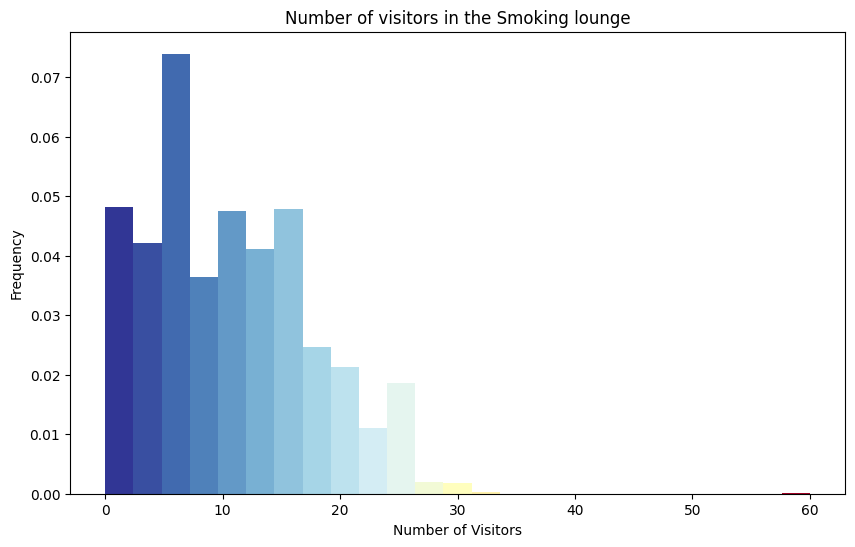

In [ ]:

# Histogram of VisitorsDuringVisit
plt.figure(figsize=(10, 6))

# histogram data
n, bins, patches = plt.hist(df_cleaned2['VisitorsDuringVisit'], bins=25, color='green', density=True)

# calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# This is the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlBu_r')

# Scale values to interval [0, 1]
col = bin_centers - min(bin_centers)
col /= max(col)

# Apply the colormap to the histogram
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

# Add title and labels
plt.title('Number of visitors in the Smoking lounge')
plt.xlabel('Number of Visitors')
plt.ylabel('Frequency')
plt.show()


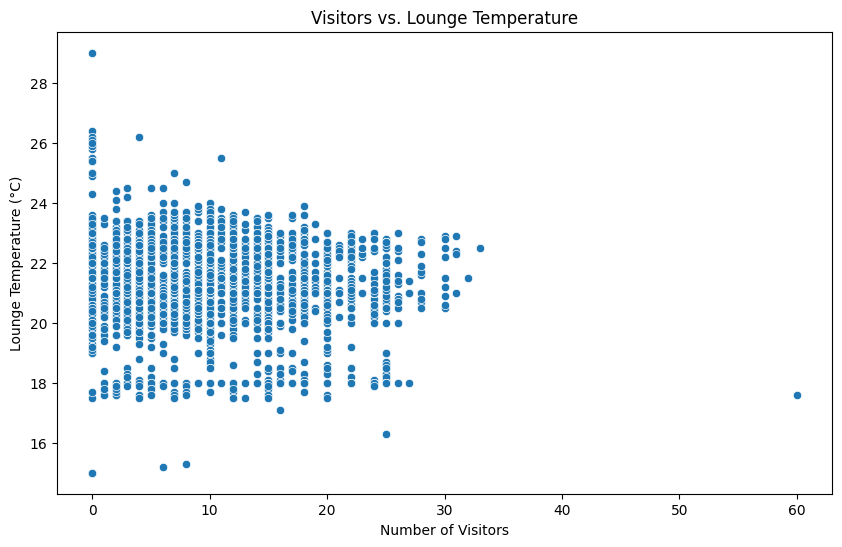

In [ ]:
#LoungeTemperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VisitorsDuringVisit', y='LoungeTemperature', data=df_cleaned2)
plt.title('Visitors vs. Lounge Temperature')
plt.xlabel('Number of Visitors')
plt.ylabel('Lounge Temperature (°C)')
plt.show()





<ipython-input-234-18fda2e77419>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




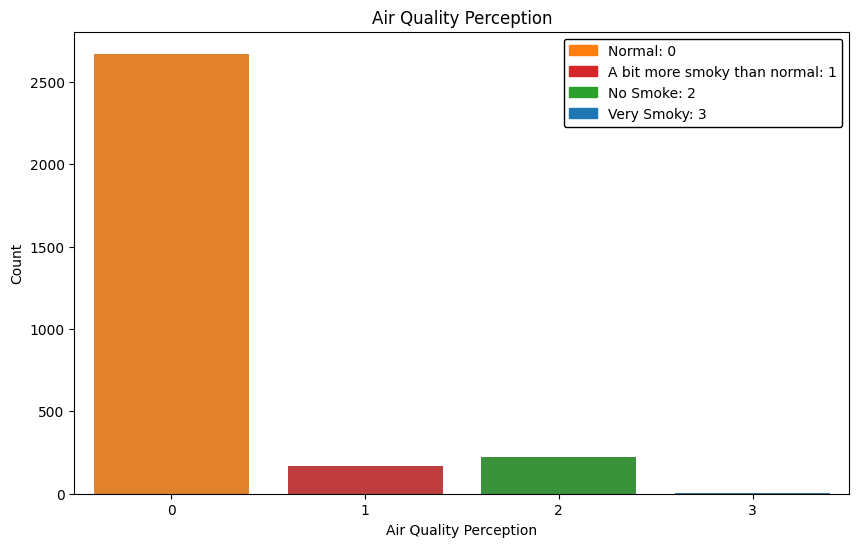

In [ ]:

import matplotlib.patches as mpatches
# Colors for each category
colors = ['#ff7f0e', '#d62728', '#2ca02c', '#1f77b4']

# Define the air_quality_mapping
air_quality_mapping = {
    'Normal': 0,
    'A bit more smoky than normal': 1,
    'No Smoke': 2,
    'Very Smoky': 3
}

# Bar Plot of AirQualityPerception
plt.figure(figsize=(10, 6))
sns.countplot(x=df_cleaned2['AirQualityPerception'], palette=colors)
plt.title('Air Quality Perception')
plt.xlabel('Air Quality Perception')
plt.ylabel('Count')

# Creating  custom legend patches
legend_patches = [mpatches.Patch(color=colors[i], label=f'{key}: {value}') for i, (key, value) in enumerate(air_quality_mapping.items())]

# Added the legend to the plot
plt.legend(handles=legend_patches, loc='upper right', frameon=True, framealpha=1, edgecolor='black')

# Show the plot
plt.show()

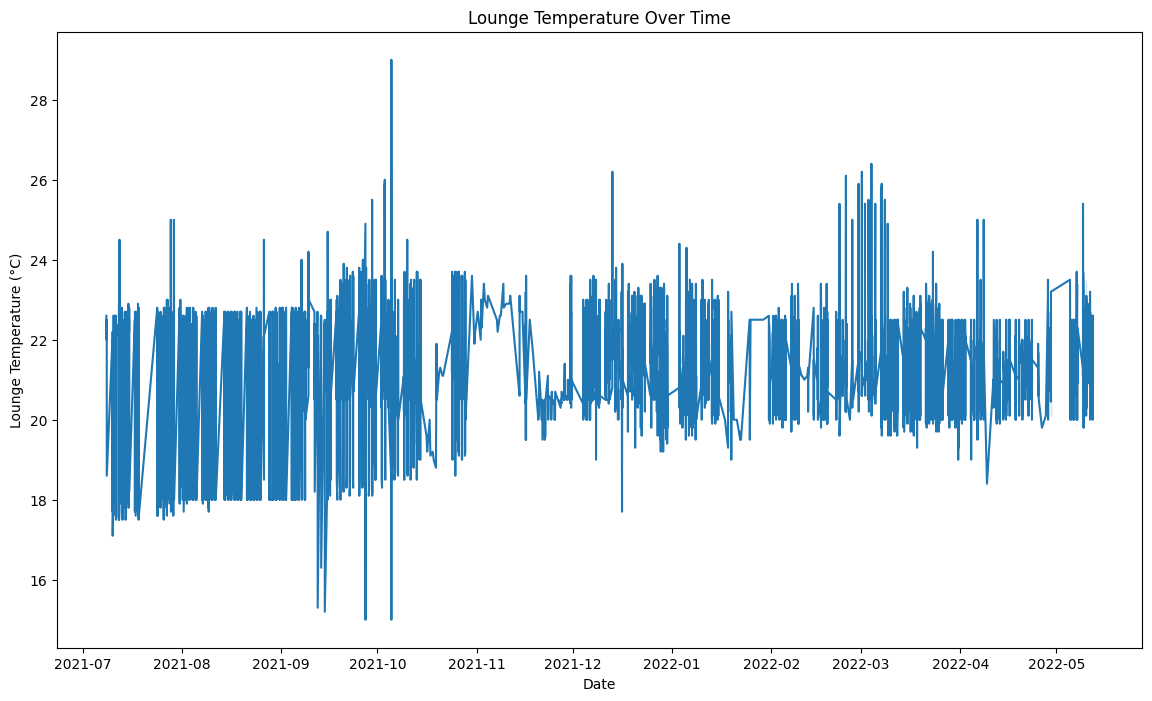

In [ ]:
# # Time Series Plot of LoungeTemperature over time
df_cleaned2['Completed At'] = pd.to_datetime(df_cleaned2['Completed At'], format='%d/%m/%Y %H:%M')
df_cleaned2.set_index('Completed At', inplace=True)

plt.figure(figsize=(14, 8))
sns.lineplot(x='Completed At', y='LoungeTemperature', data=df_cleaned2)
plt.title('Lounge Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Lounge Temperature (°C)')
plt.show()


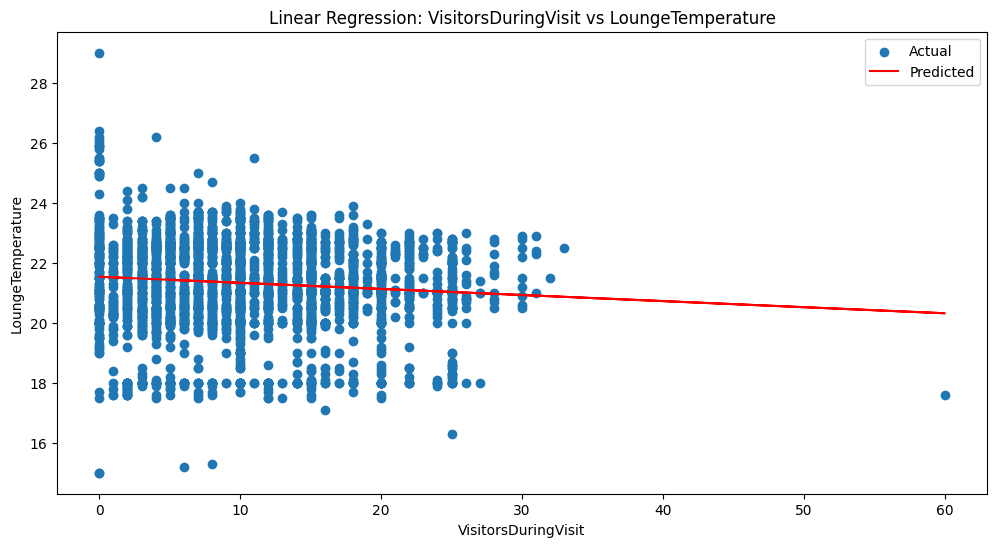

                            OLS Regression Results                            
Dep. Variable:      LoungeTemperature   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     28.48
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.02e-07
Time:                        18:40:26   Log-Likelihood:                -5506.7
No. Observations:                3067   AIC:                         1.102e+04
Df Residuals:                    3065   BIC:                         1.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.5323    

In [ ]:
import statsmodels.api as sm

# Preparing the data for regression
X = df_cleaned2[['VisitorsDuringVisit']]
y = df_cleaned2['LoungeTemperature']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Making predictions
predictions = model.predict(X)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned2['VisitorsDuringVisit'], df_cleaned2['LoungeTemperature'], label='Actual')
plt.plot(df_cleaned2['VisitorsDuringVisit'], predictions, color='red', label='Predicted')
plt.title('Linear Regression: VisitorsDuringVisit vs LoungeTemperature')
plt.xlabel('VisitorsDuringVisit')
plt.ylabel('LoungeTemperature')
plt.legend()
plt.show()

# Print regression model summary
print(model.summary())

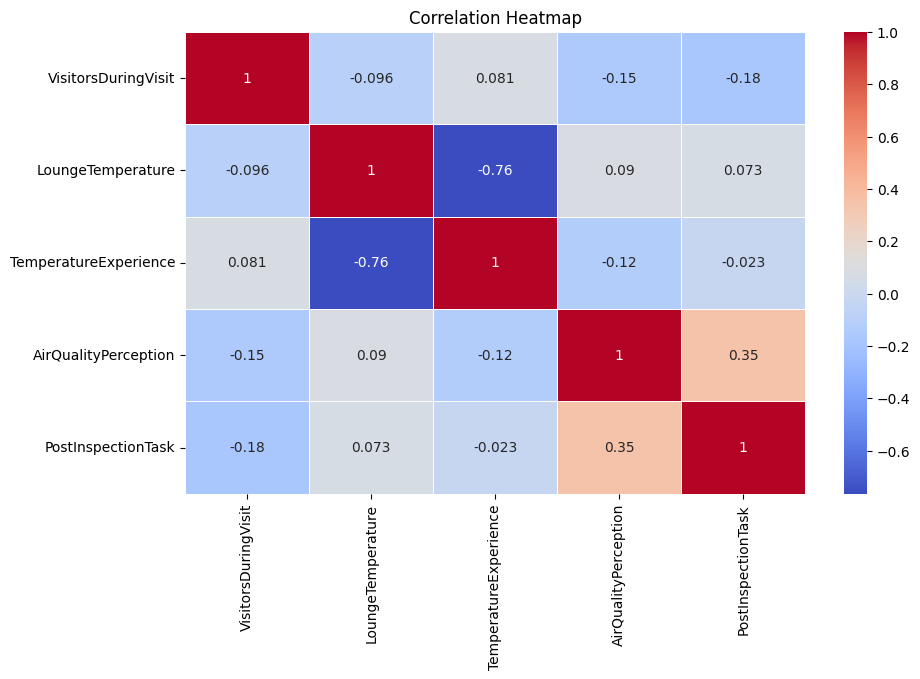

In [ ]:
# Calculate correlation matrix
correlation_matrix = df_cleaned2[['VisitorsDuringVisit', 'LoungeTemperature', 'TemperatureExperience', 'AirQualityPerception', 'PostInspectionTask']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


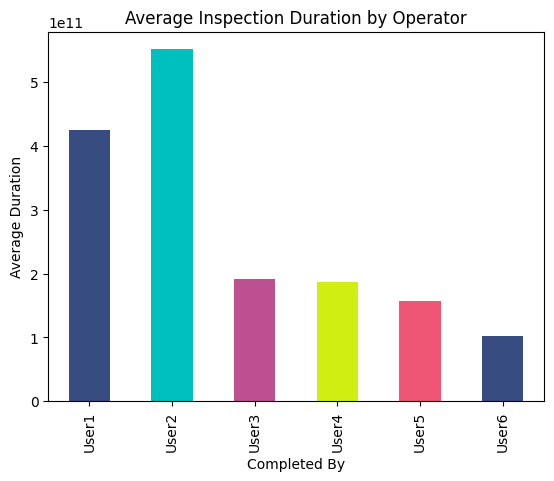

In [ ]:
# Calculate average duration for each operator
df_cleaned2['Duration'] = pd.to_timedelta(df_cleaned2['Duration'])
avg_duration = df_cleaned2.groupby('Completed By')['Duration'].mean()
colours = ["#374c80","c","#bc5090", '#d0ee11',"#ef5675"]
# Plot the average durations
avg_duration.plot(kind='bar',color=colours)

plt.ylabel('Average Duration')
plt.title('Average Inspection Duration by Operator')
plt.show()

In [ ]:
# Group by user and count the number of tasks completed
completion_rate_per_user = df_cleaned2['Completed By'].value_counts().reset_index()
completion_rate_per_user.columns = ['User', 'Inspection Completed']

print(completion_rate_per_user)


    User  Inspection Completed
0  User2                  2241
1  User1                   771
2  User5                    28
3  User3                    22
4  User4                     4
5  User6                     1


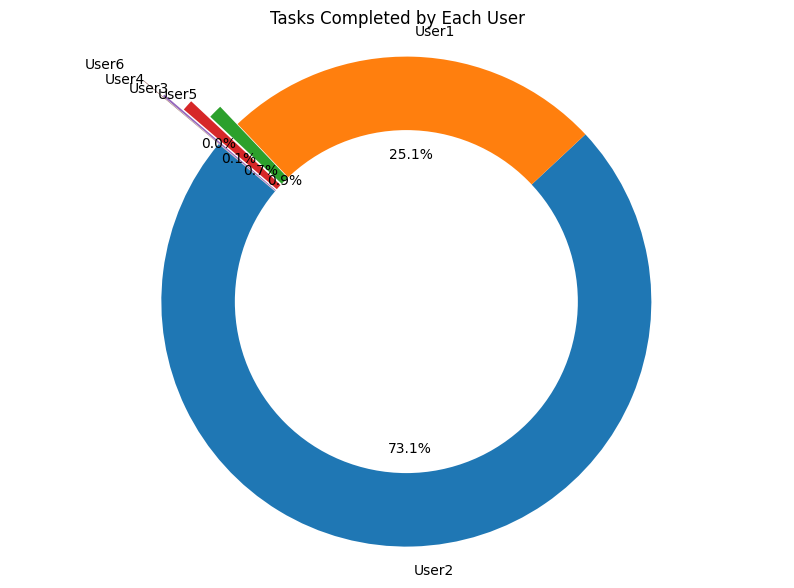

In [ ]:
completion_rate_per_user = df_cleaned2['Completed By'].value_counts().reset_index()
completion_rate_per_user.columns = ['User', 'Tasks Completed']

# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Explode the smaller sections
explode = [0, 0, 0.1, 0.2, 0.3, 0.4]
# Plotting the donut chart
plt.figure(figsize=(10, 7))
plt.pie(completion_rate_per_user['Tasks Completed'], labels=completion_rate_per_user['User'],
        autopct='%1.1f%%', startangle=140, colors=colors, explode=explode,
        textprops={'fontsize': 10})

# the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Tasks Completed by Each User')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


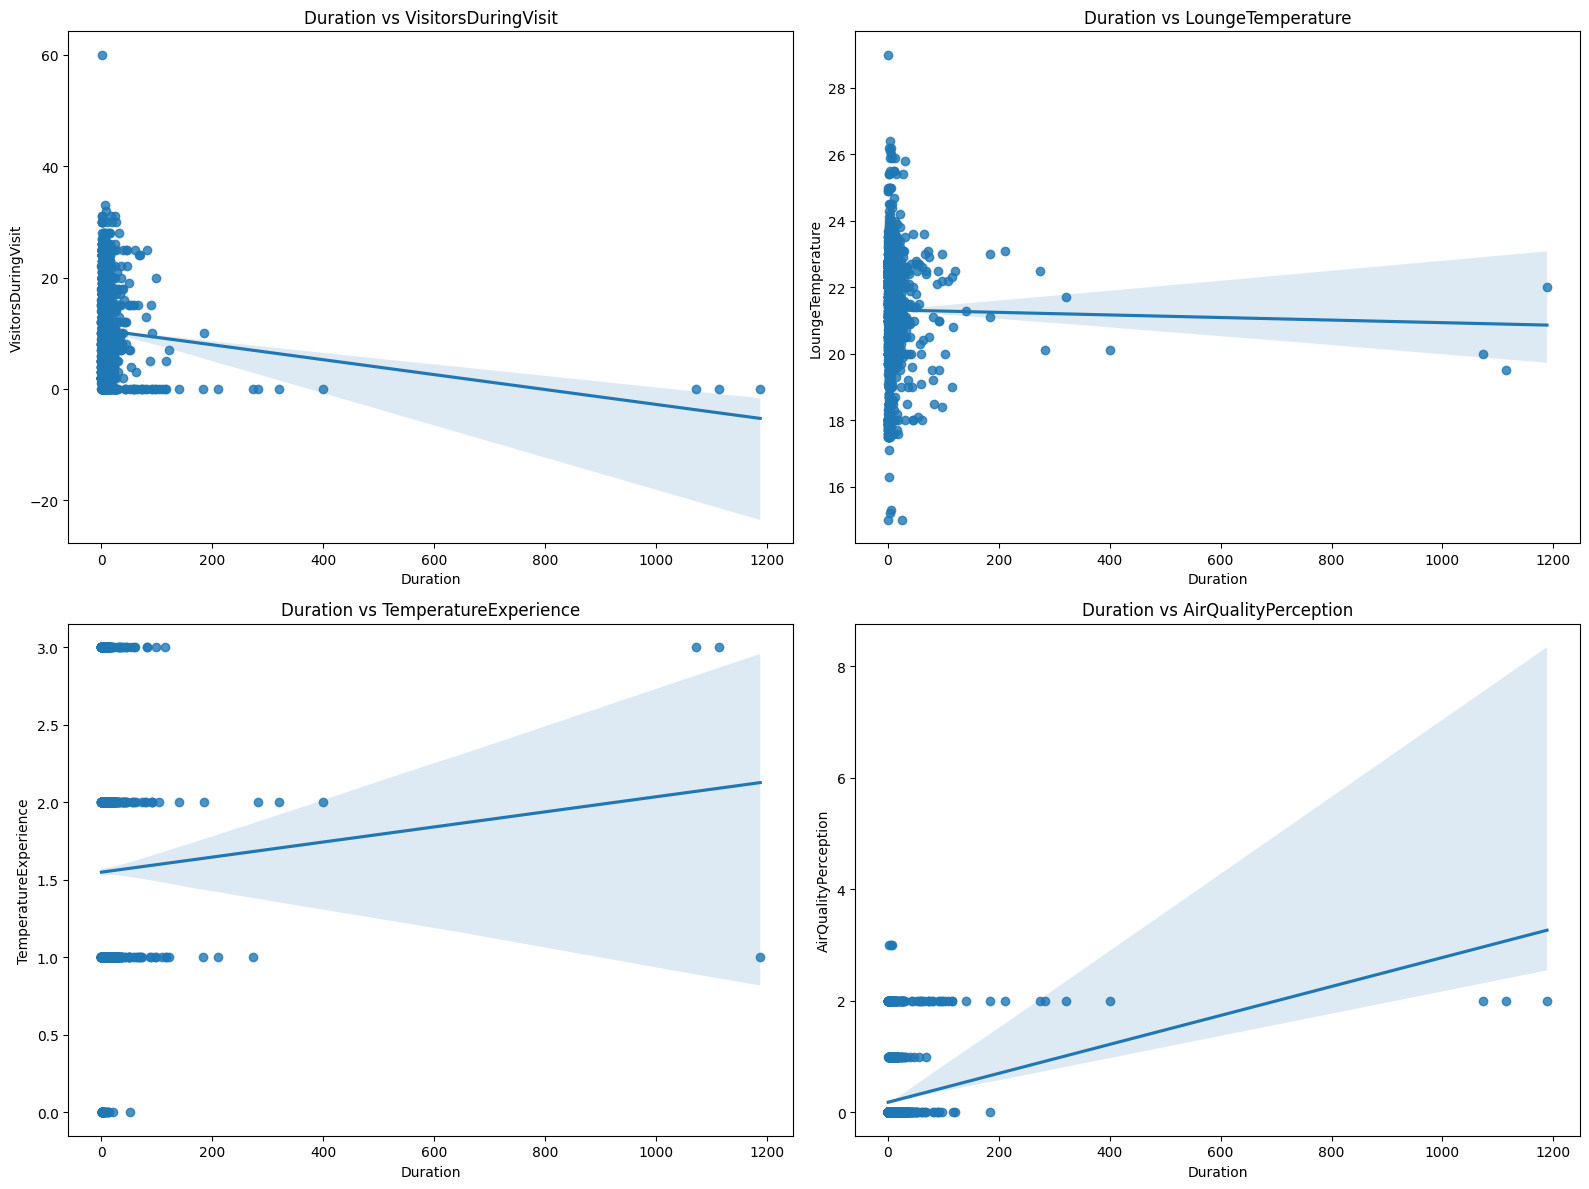

In [ ]:
# Converting Duration to a numerical format
df_cleaned2['Duration'] = pd.to_timedelta(df_cleaned2['Duration']).dt.total_seconds() / 60  # Convert to minutes

# Plotting scatter plots with regression lines
columns_to_plot = [
    ('Duration', 'VisitorsDuringVisit'),
    ('Duration', 'LoungeTemperature'),
    ('Duration', 'TemperatureExperience'),
    ('Duration', 'AirQualityPerception')
]

plt.figure(figsize=(16, 12))

for i, (x, y) in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=x, y=y, data=df_cleaned2)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

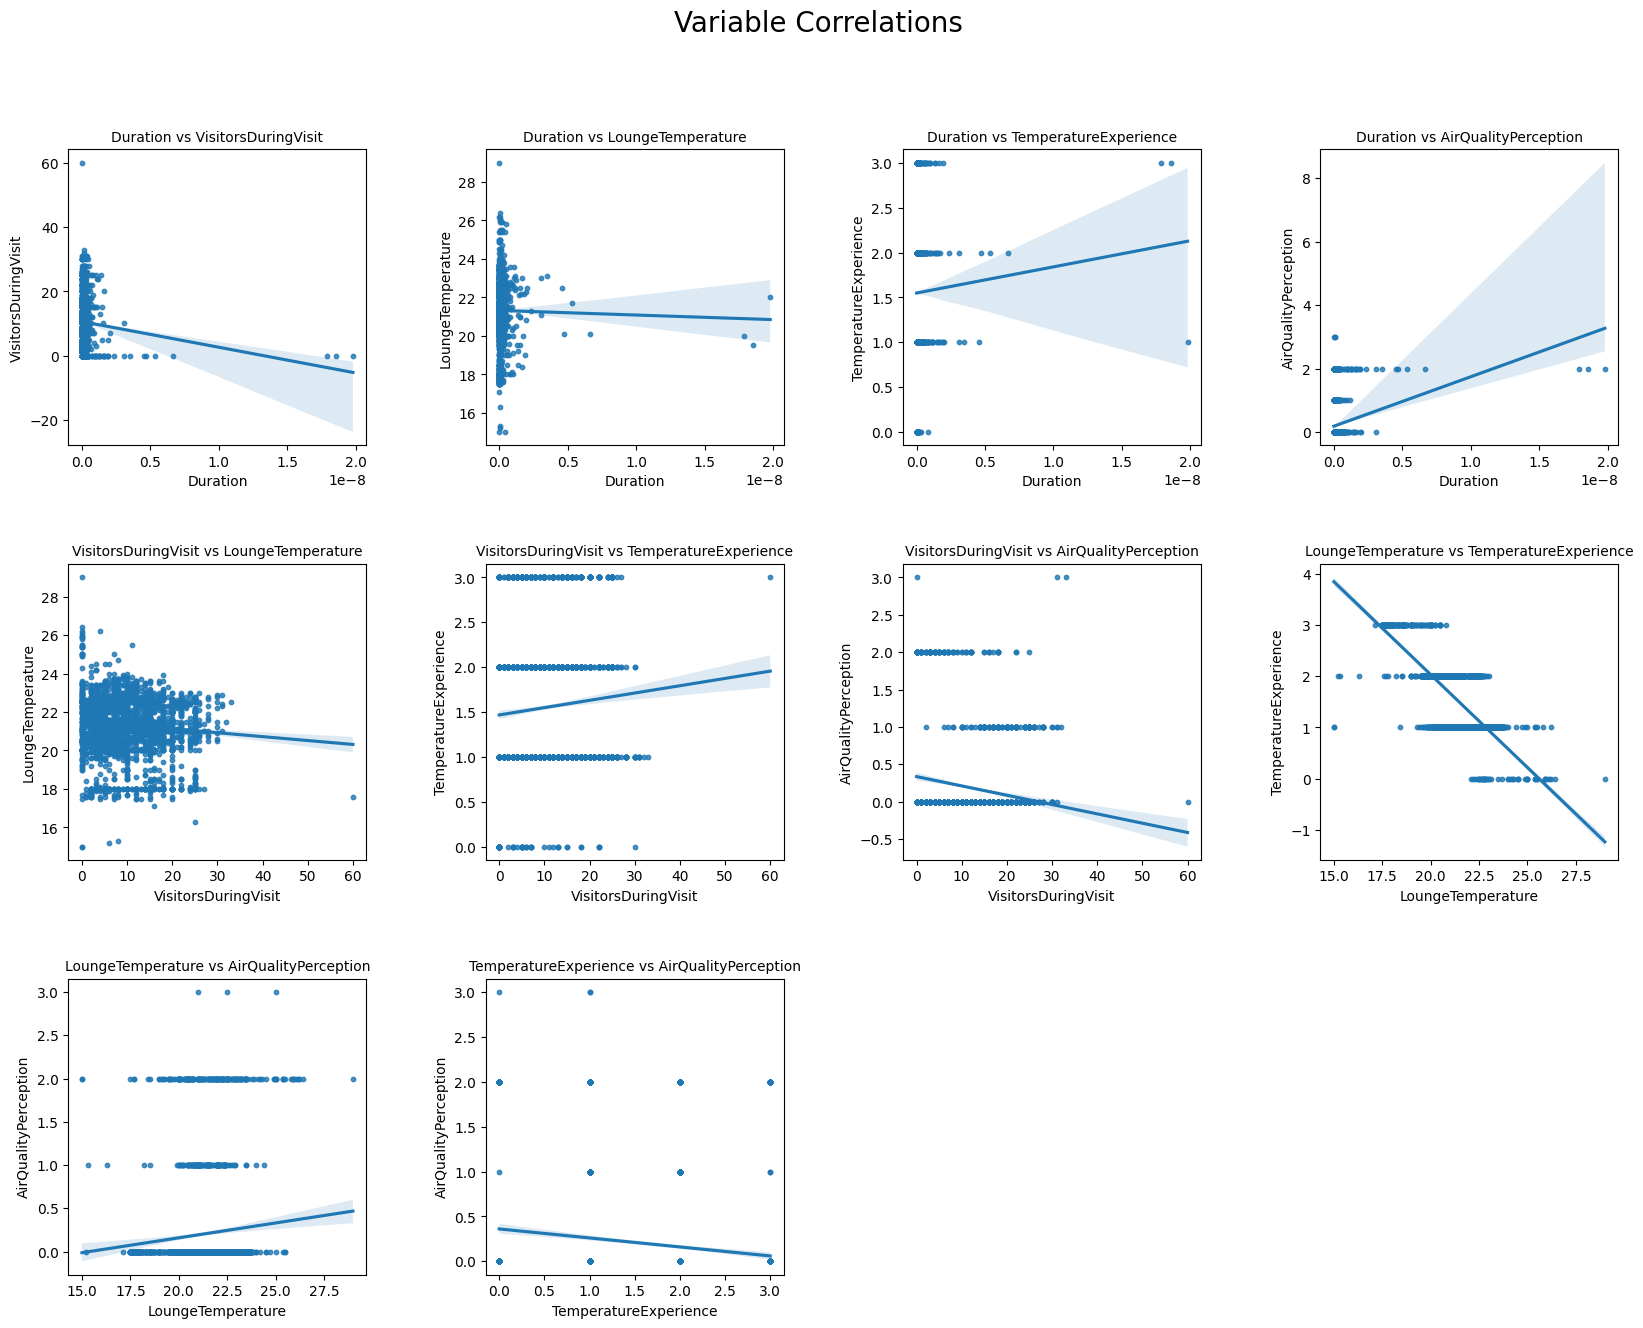

In [ ]:
#selected the columns
selected_columns = ['Duration', 'VisitorsDuringVisit', 'LoungeTemperature', 'TemperatureExperience', 'AirQualityPerception']

df_cleaned2['Duration'] = pd.to_timedelta(df_cleaned2['Duration']).dt.total_seconds()

counter = 1
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Variable Correlations', fontsize=20, position=(0.5, 0.95))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, name_i in enumerate(selected_columns):
    for j in range(i + 1, len(selected_columns)):
        name_j = selected_columns[j]
        sub = fig.add_subplot(len(selected_columns) - 1, len(selected_columns) - 1, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sns.regplot(x=name_i, y=name_j, data=df_cleaned2, scatter_kws={'s': 10}, ax=sub)
        counter += 1

plt.show()


## **DataSet 3**

In [ ]:
file_path = '/content/jcd-smart-gates-inspection.xlsx'

# Read the file into a DataFrame
df = pd.read_excel(file_path)
df.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,Asset is powered?,Pictures of the asset,...,FANS: any major issue been identified during the inspection?,Number of small fans failing/ missing,Number of medium fans failing/ missing,Number of large fans failing/ missing,TOUCH: any major issue been identified during the inspection?,OTHER: any major issue been identified during the inspection?,Asset is clean,Asset visibility OK,Is any issue pending?,Applications status
0,6986,11/05/2022 19:59,User1,00:02:12,"25.1911434, 55.2753573",Smart Gates RTA,BI00050 - Downtown - Burj Plaza,BI00050,YES,NaN,...,YES,2.0,NaN,1.0,YES,NO,No - full cleaning is required,YES,YES,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
1,6985,11/05/2022 17:01,User1,00:01:02,"25.1915278, 55.2430681",Smart Gates RTA,BI00021 - Canal Walk Under Al Wasl Road Bridge...,BI00021,YES,NaN,...,NO,NaN,NaN,NaN,NO,YES,Yes - quick cleaning carried out during the in...,YES,NO,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
2,6984,11/05/2022 15:48,User1,00:03:09,"25.1481826, 55.1947804",Smart Gates RTA,BI00007 - Jum. beach Kiosk - Wide range,BI00007,YES,NaN,...,NO,NaN,NaN,NaN,NO,NO,Yes - quick cleaning carried out during the in...,YES,NO,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
3,6983,11/05/2022 14:33,User1,00:01:03,"25.2285863, 55.2611532",Smart Gates RTA,BI00029 - Jum. Road - Opp to La Mer,BI00029,YES,NaN,...,NO,NaN,NaN,NaN,NO,YES,Yes - quick cleaning carried out during the in...,YES,NO,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
4,6958,10/05/2022 18:22,User1,00:01:15,"25.2646363, 55.2931557",Smart Gates RTA,BI00030 - Bur Dubai Abra Station - Loc. 1,BI00030,YES,NaN,...,NO,NaN,NaN,NaN,NO,NO,Yes - quick cleaning carried out during the in...,YES,NO,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Report No                                                        1086 non-null   int64  
 1   Completed At                                                     1086 non-null   object 
 2   Completed By                                                     1085 non-null   object 
 3   Duration                                                         1086 non-null   object 
 4   Coordinates                                                      1086 non-null   object 
 5   Asset Location                                                   1086 non-null   object 
 6   Asset                                                            1086 non-null   object 
 7   Asset Unique Code                         

In [ ]:
dfcleaned_3 = df.dropna(axis=1, how='all')
dfcleaned_3.head()

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,Asset is powered?,DISPLAY: any major issue been identified during the inspection?,FANS: any major issue been identified during the inspection?,Number of small fans failing/ missing,Number of medium fans failing/ missing,Number of large fans failing/ missing,TOUCH: any major issue been identified during the inspection?,OTHER: any major issue been identified during the inspection?,Asset is clean,Asset visibility OK,Is any issue pending?,Applications status
0,6986,11/05/2022 19:59,User1,00:02:12,"25.1911434, 55.2753573",Smart Gates RTA,BI00050 - Downtown - Burj Plaza,BI00050,YES,NO,YES,2.0,NaN,1.0,YES,NO,No - full cleaning is required,YES,YES,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
1,6985,11/05/2022 17:01,User1,00:01:02,"25.1915278, 55.2430681",Smart Gates RTA,BI00021 - Canal Walk Under Al Wasl Road Bridge...,BI00021,YES,NO,NO,NaN,NaN,NaN,NO,YES,Yes - quick cleaning carried out during the in...,YES,NO,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
2,6984,11/05/2022 15:48,User1,00:03:09,"25.1481826, 55.1947804",Smart Gates RTA,BI00007 - Jum. beach Kiosk - Wide range,BI00007,YES,NO,NO,NaN,NaN,NaN,NO,NO,Yes - quick cleaning carried out during the in...,YES,NO,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
3,6983,11/05/2022 14:33,User1,00:01:03,"25.2285863, 55.2611532",Smart Gates RTA,BI00029 - Jum. Road - Opp to La Mer,BI00029,YES,NO,NO,NaN,NaN,NaN,NO,YES,Yes - quick cleaning carried out during the in...,YES,NO,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
4,6958,10/05/2022 18:22,User1,00:01:15,"25.2646363, 55.2931557",Smart Gates RTA,BI00030 - Bur Dubai Abra Station - Loc. 1,BI00030,YES,NO,NO,NaN,NaN,NaN,NO,NO,Yes - quick cleaning carried out during the in...,YES,NO,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"


In [ ]:
dfcleaned_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Report No                                                        1086 non-null   int64  
 1   Completed At                                                     1086 non-null   object 
 2   Completed By                                                     1085 non-null   object 
 3   Duration                                                         1086 non-null   object 
 4   Coordinates                                                      1086 non-null   object 
 5   Asset Location                                                   1086 non-null   object 
 6   Asset                                                            1086 non-null   object 
 7   Asset Unique Code                         

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = dfcleaned_3.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Report No                                                           0.000000
Completed At                                                        0.000000
Completed By                                                        0.092081
Duration                                                            0.000000
Coordinates                                                         0.000000
Asset Location                                                      0.000000
Asset                                                               0.000000
Asset Unique Code                                                   0.000000
Asset is powered?                                                   0.000000
DISPLAY: any major issue been identified during the inspection?     0.000000
FANS: any major issue been identified during the inspection?        0.000000
Number of small fans failing/ missing                              96.685083
Number of medium fans failing/ 

In [ ]:

# Set the threshold for missing data
threshold = 50  # 50%

# Identify columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index
print("\nColumns to drop (more than 50% missing data):")
print(columns_to_drop)# Drop the columns with more than 50% missing data
dfcleaned_3 = dfcleaned_3.drop(columns=columns_to_drop)

# Display the DataFrame info after dropping columns
print("\nDataFrame info after dropping columns with more than 50% missing data:")
dfcleaned_3.info()


Columns to drop (more than 50% missing data):
Index(['Number of small fans failing/ missing',
       'Number of medium fans failing/ missing',
       'Number of large fans failing/ missing'],
      dtype='object')

DataFrame info after dropping columns with more than 50% missing data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 17 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Report No                                                        1086 non-null   int64 
 1   Completed At                                                     1086 non-null   object
 2   Completed By                                                     1085 non-null   object
 3   Duration                                                         1086 non-null   object
 4   Coordinates                                

In [ ]:
dfcleaned_3.rename(columns={
    'Asset is powered?': 'Asset Powered',
    'DISPLAY: any major issue been identified during the inspection?': 'Display_Issue',
    'FANS: any major issue been identified during the inspection?': 'Fans_Issue',
    'TOUCH: any major issue been identified during the inspection?': 'Touch_Issue',
    'OTHER:  any major issue been identified during the inspection?': 'Other_Issue',
    'Asset is clean': 'Asset Cleaned',
    'Asset visibility OK': 'Visibility Check',
    'Is any issue pending?': 'Pending Issues',
    'Applications status': 'Application_Status'
}, inplace=True)

In [ ]:
dfcleaned_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report No           1086 non-null   int64 
 1   Completed At        1086 non-null   object
 2   Completed By        1085 non-null   object
 3   Duration            1086 non-null   object
 4   Coordinates         1086 non-null   object
 5   Asset Location      1086 non-null   object
 6   Asset               1086 non-null   object
 7   Asset Unique Code   1086 non-null   object
 8   Asset Powered       1086 non-null   object
 9   Display_Issue       1086 non-null   object
 10  Fans_Issue          1086 non-null   object
 11  Touch_Issue         1086 non-null   object
 12  Other_Issue         1086 non-null   object
 13  Asset Cleaned       1086 non-null   object
 14  Visibility Check    1086 non-null   object
 15  Pending Issues      1086 non-null   object
 16  Application_Status  1014

# **Encoding the categorial**

In [ ]:
# Convert categorical data to numerical codes for dfcleaned_3
dfcleaned_3['Asset Powered'] = dfcleaned_3['Asset Powered'].map({'YES': 1, 'NO': 0})
dfcleaned_3['Display_Issue'] = dfcleaned_3['Display_Issue'].map({'YES': 1, 'NO': 0})
dfcleaned_3['Fans_Issue'] = dfcleaned_3['Fans_Issue'].map({'YES': 1, 'NO': 0})
dfcleaned_3['Touch_Issue'] = dfcleaned_3['Touch_Issue'].map({'YES': 1, 'NO': 0})
dfcleaned_3['Other_Issue'] = dfcleaned_3['Other_Issue'].map({'YES': 1, 'NO': 0})
dfcleaned_3['Asset Cleaned'] = dfcleaned_3['Asset Cleaned'].map({
    'Yes - quick cleaning carried out during the inspection': 1,
    'No - full cleaning is required': 0
})
dfcleaned_3['Visibility Check'] = dfcleaned_3['Visibility Check'].map({'YES': 1, 'NO': 0})
dfcleaned_3['Pending Issues'] = dfcleaned_3['Pending Issues'].map({'YES': 1, 'NO': 0})


In [ ]:
dfcleaned_3

,Report No,Completed At,Completed By,Duration,Coordinates,Asset Location,Asset,Asset Unique Code,Asset Powered,Display_Issue,Fans_Issue,Touch_Issue,Other_Issue,Asset Cleaned,Visibility Check,Pending Issues,Application_Status
0,6986,11/05/2022 19:59,User1,00:02:12,"25.1911434, 55.2753573",Smart Gates RTA,BI00050 - Downtown - Burj Plaza,BI00050,1,0,1,1,0,0,1,1,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
1,6985,11/05/2022 17:01,User1,00:01:02,"25.1915278, 55.2430681",Smart Gates RTA,BI00021 - Canal Walk Under Al Wasl Road Bridge...,BI00021,1,0,0,0,1,1,1,0,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
2,6984,11/05/2022 15:48,User1,00:03:09,"25.1481826, 55.1947804",Smart Gates RTA,BI00007 - Jum. beach Kiosk - Wide range,BI00007,1,0,0,0,0,1,1,0,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
3,6983,11/05/2022 14:33,User1,00:01:03,"25.2285863, 55.2611532",Smart Gates RTA,BI00029 - Jum. Road - Opp to La Mer,BI00029,1,0,0,0,1,1,1,0,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
4,6958,10/05/2022 18:22,User1,00:01:15,"25.2646363, 55.2931557",Smart Gates RTA,BI00030 - Bur Dubai Abra Station - Loc. 1,BI00030,1,0,0,0,0,1,1,0,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2063,08/09/2021 13:20,User3,00:02:56,"25.2854732, 55.41008",Smart Gates RTA,BI00005 - Jum. beach Kiosk - Jamba Juice,BI00005,1,0,0,0,0,1,1,1,NaN
1082,2062,08/09/2021 13:17,User3,00:02:52,"25.2854716, 55.4100778",Smart Gates RTA,BI00005 - Jum. beach Kiosk - Jamba Juice,BI00005,0,0,0,0,0,0,1,1,NaN
1083,2051,08/09/2021 09:01,User3,00:00:41,"25.2854727, 55.4100826",Smart Gates RTA,BI00005 - Jum. beach Kiosk - Jamba Juice,BI00005,0,0,0,0,0,1,1,1,NaN
1084,2050,08/09/2021 08:17,User3,00:00:50,"25.2854736, 55.4100823",Smart Gates RTA,BI00005 - Jum. beach Kiosk - Jamba Juice,BI00005,1,0,0,0,0,1,1,0,"Weather,Gulf News,RTA twitter,Prayer Times,S'hail"


In [ ]:
dfcleaned_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report No           1086 non-null   int64 
 1   Completed At        1086 non-null   object
 2   Completed By        1085 non-null   object
 3   Duration            1086 non-null   object
 4   Coordinates         1086 non-null   object
 5   Asset Location      1086 non-null   object
 6   Asset               1086 non-null   object
 7   Asset Unique Code   1086 non-null   object
 8   Asset Powered       1086 non-null   int64 
 9   Display_Issue       1086 non-null   int64 
 10  Fans_Issue          1086 non-null   int64 
 11  Touch_Issue         1086 non-null   int64 
 12  Other_Issue         1086 non-null   int64 
 13  Asset Cleaned       1086 non-null   int64 
 14  Visibility Check    1086 non-null   int64 
 15  Pending Issues      1086 non-null   int64 
 16  Application_Status  1014

# **All Isuues**

<ipython-input-255-f3d26d8270dc>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




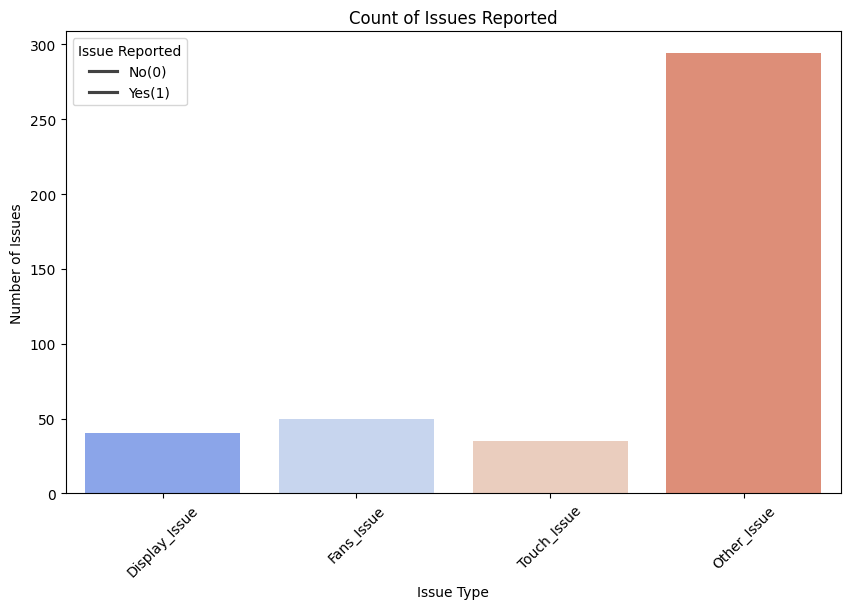

In [ ]:
issue_columns = ['Display_Issue', 'Fans_Issue', 'Touch_Issue', 'Other_Issue']
issue_data = dfcleaned_3[issue_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=issue_data.index, y=issue_data.values, palette='coolwarm')
plt.title('Count of Issues Reported')
plt.ylabel('Number of Issues')
plt.xlabel('Issue Type')
plt.xticks(rotation=45)
plt.legend(title='Issue Reported', labels=['No(0)', 'Yes(1)'])
plt.show()

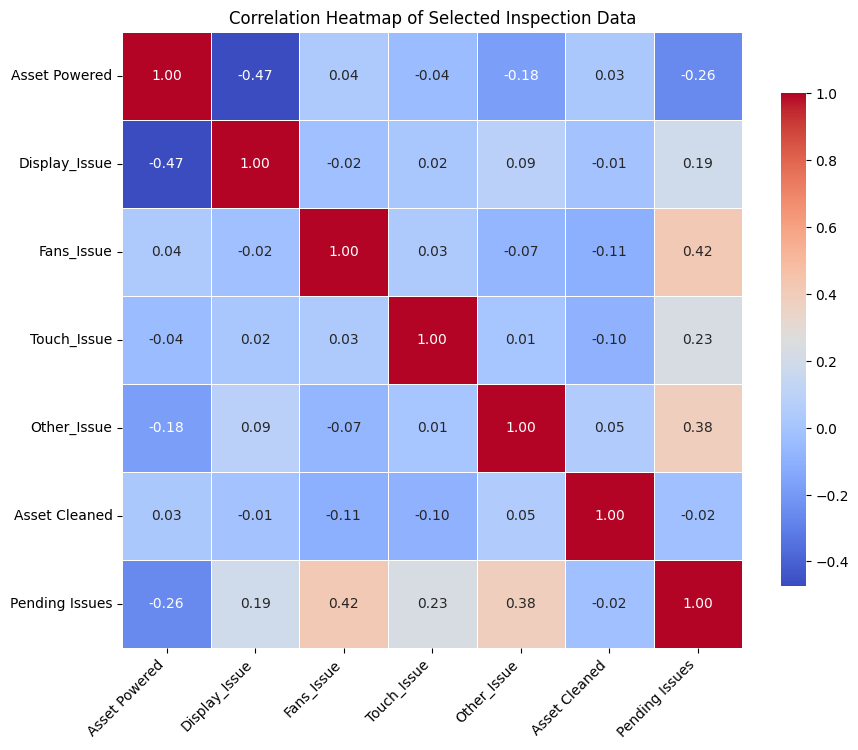

In [ ]:
#Finding correlation on selected

selected_columns = [
    'Asset Powered', 'Display_Issue', 'Fans_Issue', 'Touch_Issue',
    'Other_Issue', 'Asset Cleaned', 'Pending Issues'
]

df_selected = dfcleaned_3[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Selected Inspection Data')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
dfcleaned_3['Completed At'] = pd.to_datetime(dfcleaned_3['Completed At'], format='%d/%m/%Y %H:%M')

df_issues_timed = dfcleaned_3.set_index('Completed At')

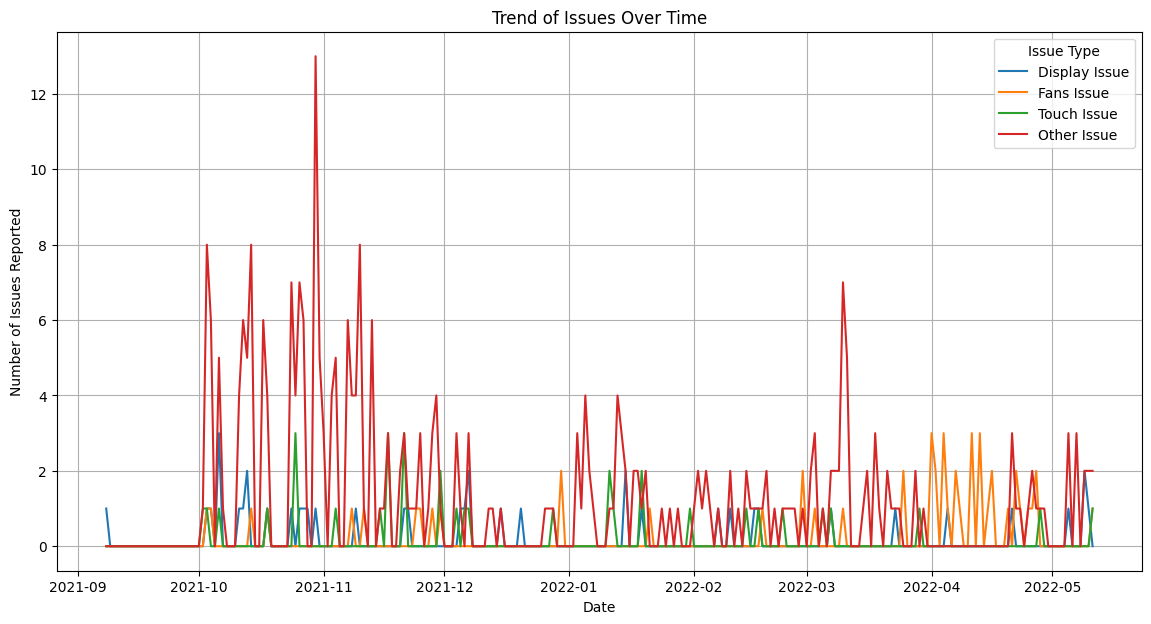

In [ ]:
#Trends over time
issue_columns = ['Display_Issue', 'Fans_Issue', 'Touch_Issue', 'Other_Issue']

# Group data by date and sum up the issues in the dummy df
issue_trends = df_issues_timed[issue_columns].resample('D').sum()  # 'D' means daily frequency

# Plotting
plt.figure(figsize=(14, 7))
for column in issue_columns:
    plt.plot(issue_trends.index, issue_trends[column], label=column.replace('_', ' ').title())

plt.title('Trend of Issues Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Issues Reported')
plt.legend(title='Issue Type')
plt.grid(True)
plt.show()

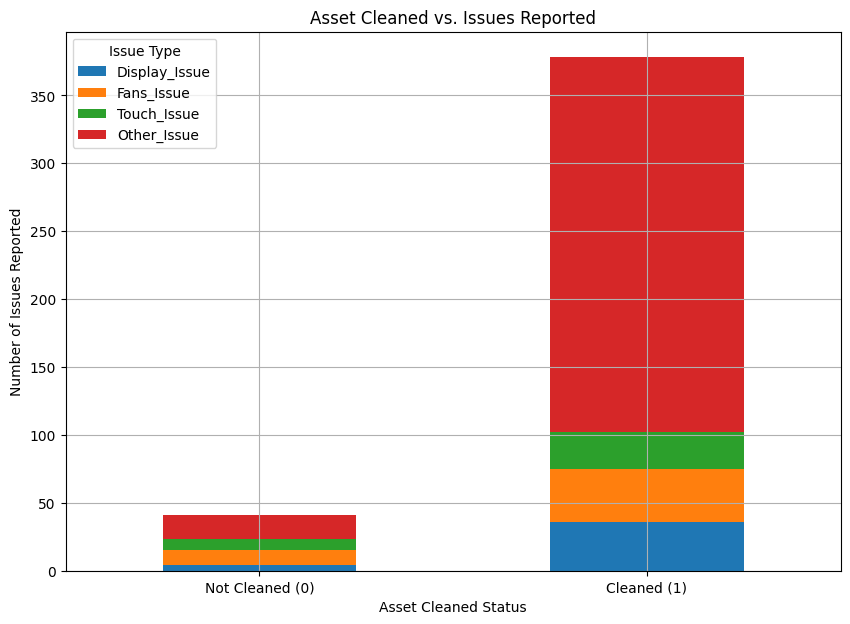

In [ ]:


# Group data by 'Asset Cleaned' and sum up the issues
grouped_issues = df_issues_timed.groupby('Asset Cleaned')[['Display_Issue', 'Fans_Issue', 'Touch_Issue', 'Other_Issue']].sum()

# Plotting a stacked bar chart
grouped_issues.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Asset Cleaned vs. Issues Reported')
plt.xlabel('Asset Cleaned Status')
plt.ylabel('Number of Issues Reported')
plt.xticks(ticks=[0, 1], labels=['Not Cleaned (0)', 'Cleaned (1)'], rotation=0)  # Adjust the labels for clarity
plt.legend(title='Issue Type')
plt.grid(True)
plt.show()


# **Inspection Count per Use**

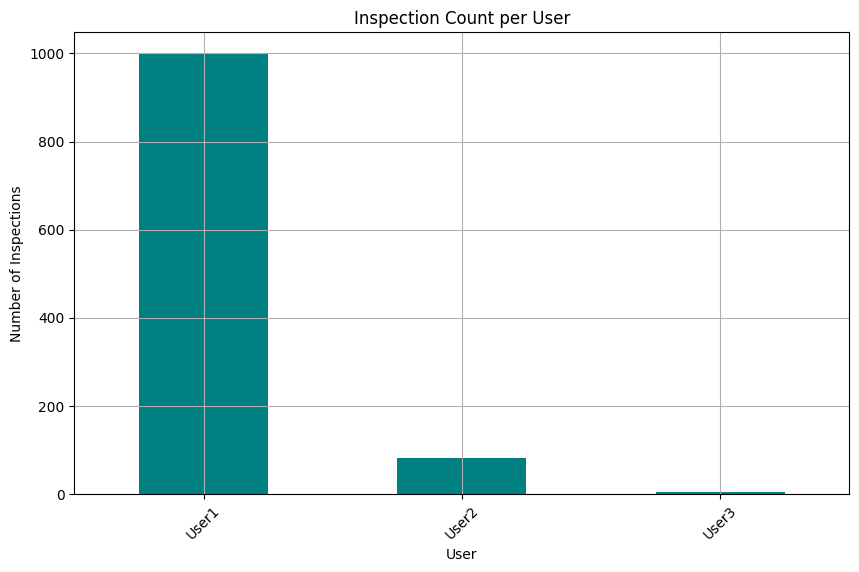

In [ ]:
inspection_counts = df_issues_timed['Completed By'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
inspection_counts.plot(kind='bar', color='teal')
plt.title('Inspection Count per User')
plt.xlabel('User')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Daily Inspection Activity

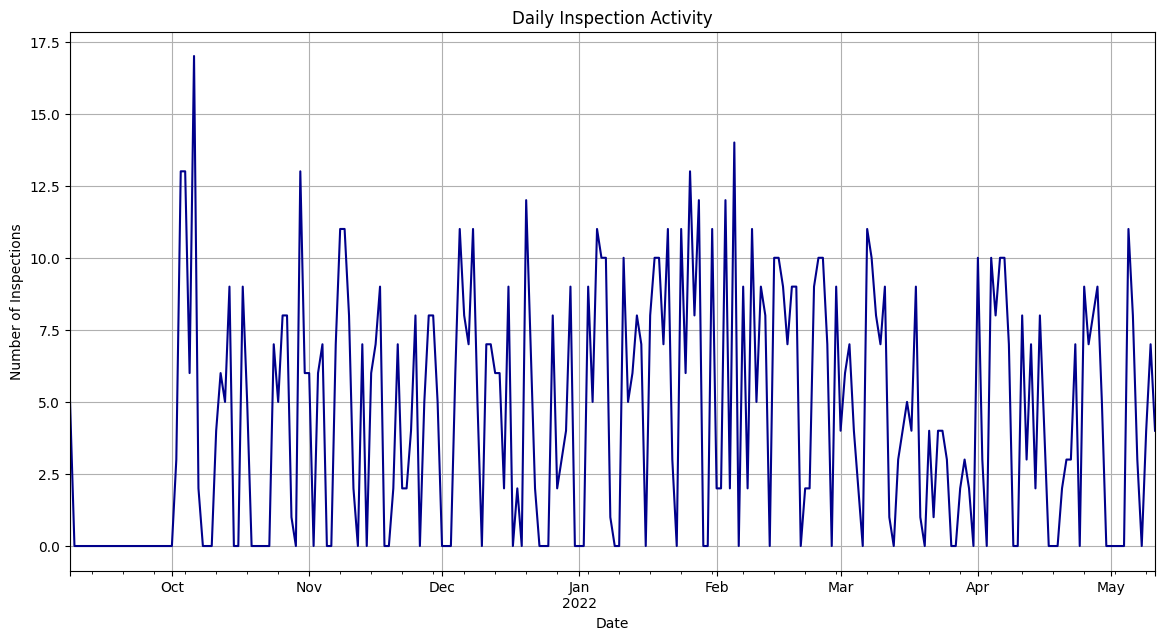

In [ ]:
daily_activity = df_issues_timed.resample('D').size()

# Plotting
plt.figure(figsize=(14, 7))
daily_activity.plot(color='darkblue')
plt.title('Daily Inspection Activity')
plt.xlabel('Date')
plt.ylabel('Number of Inspections')
plt.grid(True)
plt.show()

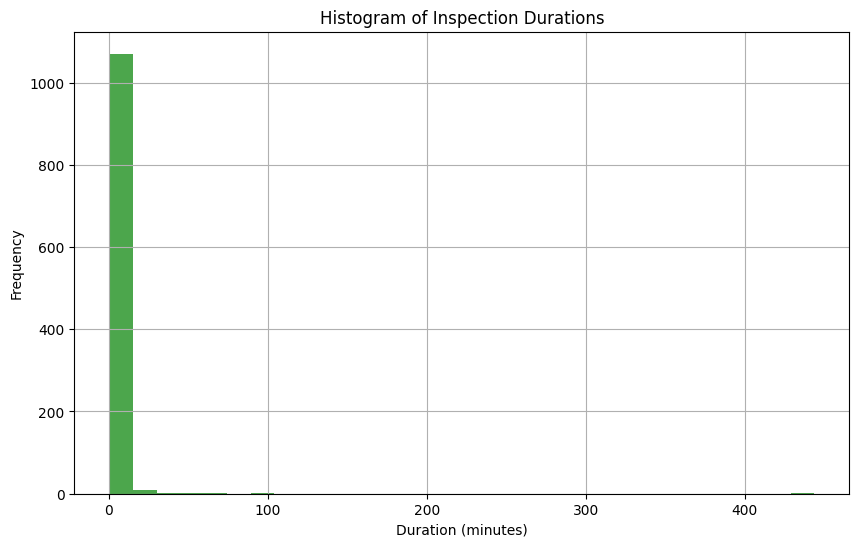

In [ ]:
dfcleaned_3['Duration'] = pd.to_timedelta(dfcleaned_3['Duration'])

# Calculated total seconds from timedelta for easier manipulation
dfcleaned_3['Duration_seconds'] = dfcleaned_3['Duration'].dt.total_seconds()

# Plotting a histogram of durations, converting seconds to minutes
plt.figure(figsize=(10, 6))
plt.hist(dfcleaned_3['Duration_seconds'] / 60, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Inspection Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

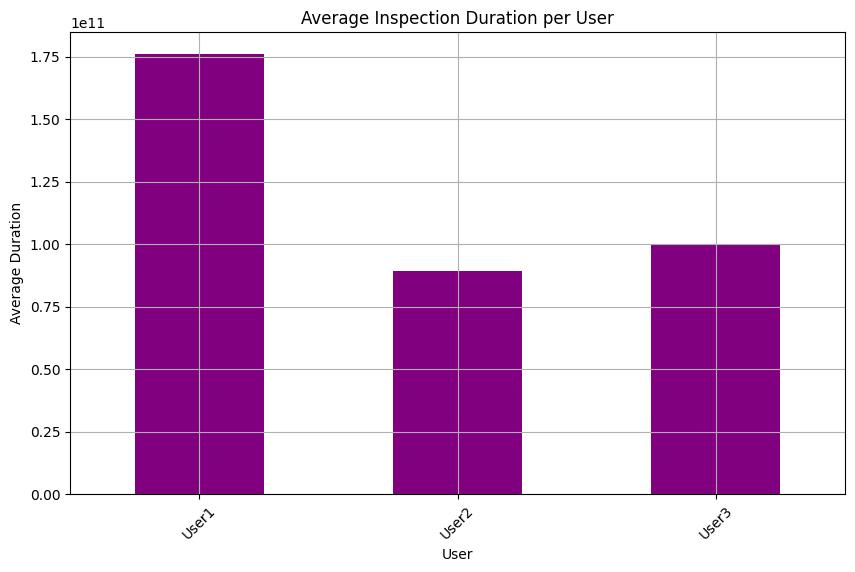

In [ ]:
average_durations = dfcleaned_3.groupby('Completed By')['Duration'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_durations.plot(kind='bar', color='purple')
plt.title('Average Inspection Duration per User')
plt.xlabel('User')
plt.ylabel('Average Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()